**DỰ ĐOÁN CHO 14 NGÀY**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, concatenate, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.optimizers import Adam
import time
from datetime import datetime
import math
seed_value= 644

# (1) THU THẬP DỮ LIỆU

Dữ liệu bao gồm 3 loại cổ phiếu của Google, Apple và Netflix trong khoảng 12 năm (từ 11/2010-11/2022). Mỗi cổ phiếu bao gồm 7 cột:

*	Date: chứa thời gian (ngày/tháng/năm) tại thời điểm giao dịch.
*	Open: cho biết giá mà cổ phiếu bắt đầu giao dịch khi thị trường mở cửa vào một ngày cụ thể.
*	High: mức giá cao nhất mà một cổ phiếu được giao dịch trong một khoảng thời gian.
*	Low: cho biết giá thấp nhất trong khoảng thời gian đó.
*	Close: cho biết giá mà cổ phiếu kết thúc giao dịch khi thị trường đóng cửa vào một ngày cụ thể.
*	Adj Close: giá được điều chỉnh lại để xác định giá trị chính xác của cổ phiếu, trong trường hợp công ty có các hoạt động làm thay đổi số lượng cổ phiếu.
*	Volume: tổng khối lượng hoạt động giao dịch trong một khoảng thời gian.

In [ ]:
df_Google = pd.read_csv('/content/drive/Shareddrives/CKI_ML/GOOG.csv', index_col=['Date'])
df_Apple = pd.read_csv('/content/drive/Shareddrives/CKI_ML/AAPL.csv', index_col=['Date'])
df_Netflix = pd.read_csv('/content/drive/Shareddrives/CKI_ML/NFLX.csv', index_col=['Date'])

In [ ]:
# df = df.set_index('Date')
df_Google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,15.335768,15.458558,15.223190,15.317586,15.317586,123946848
2010-11-02,15.408993,15.442119,15.307125,15.332530,15.332530,80203500
2010-11-03,15.379853,15.487698,15.280226,15.446602,15.446602,135726838
2010-11-04,15.557686,15.689193,15.494423,15.548471,15.548471,143367369
2010-11-05,15.521322,15.578857,15.469766,15.568645,15.568645,70892731


In [ ]:
df_Apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,10.793571,10.914286,10.792857,10.863571,9.260303,423889200
2010-11-02,10.964286,11.078214,10.964286,11.048571,9.417997,433930000
2010-11-03,11.120357,11.174286,11.018929,11.171429,9.522726,508348400
2010-11-04,11.266071,11.435000,11.251071,11.366786,9.689249,642488000
2010-11-05,11.356786,11.413214,11.312500,11.326071,9.654545,361253200


In [ ]:
df_Netflix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,24.850000,24.857143,23.671429,23.910000,23.910000,34553400
2010-11-02,23.812857,24.768572,23.794287,24.515715,24.515715,38203200
2010-11-03,24.662857,24.862858,24.147142,24.494286,24.494286,27377000
2010-11-04,24.764286,24.775715,23.799999,23.974285,23.974285,41218800
2010-11-05,24.405714,24.415714,23.837143,24.014286,24.014286,21994000


In [ ]:
columns_Google = list(df_Google.columns)
columns_Apple = list(df_Google.columns)
columns_Netflix = list(df_Google.columns)
print(columns_Google)
print(columns_Apple)
print(columns_Netflix)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
df_Google.info()
df_Apple.info()
df_Netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3021 entries, 2010-11-01 to 2022-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3021 non-null   float64
 1   High       3021 non-null   float64
 2   Low        3021 non-null   float64
 3   Close      3021 non-null   float64
 4   Adj Close  3021 non-null   float64
 5   Volume     3021 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3021 entries, 2010-11-01 to 2022-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3021 non-null   float64
 1   High       3021 non-null   float64
 2   Low        3021 non-null   float64
 3   Close      3021 non-null   float64
 4   Adj Close  3021 non-null   float64
 5   Volume     3021 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.2+ KB
<class 'pandas.core.fr

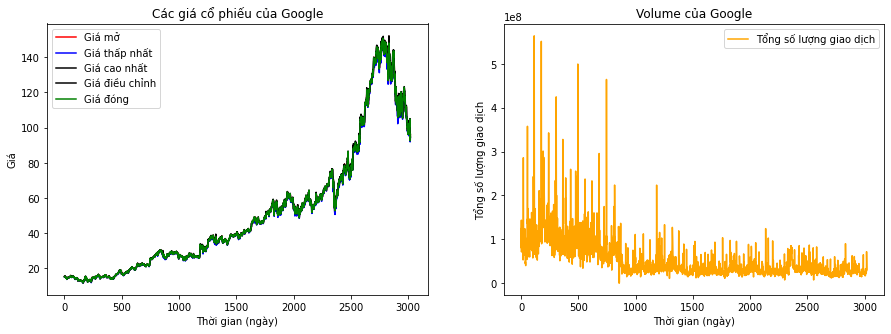

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(df_Google.Open.values, color='red', label='Giá mở')
plt.plot(df_Google.Low.values, color='blue', label='Giá thấp nhất')
plt.plot(df_Google.High.values, color='black', label='Giá cao nhất')
plt.plot(df_Google['Adj Close'].values, color='black', label='Giá điều chỉnh')
plt.plot(df_Google.Close.values, color='green', label='Giá đóng')
plt.title('Các giá cổ phiếu của Google')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Giá')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df_Google.Volume.values, color='orange', label='Tổng số lượng giao dịch')
plt.title('Volume của Google')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Tổng số lượng giao dịch')
plt.legend(loc='best');

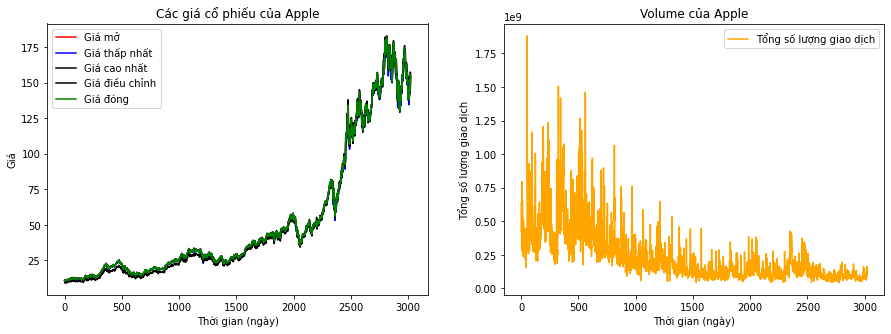

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(df_Apple.Open.values, color='red', label='Giá mở')
plt.plot(df_Apple.Low.values, color='blue', label='Giá thấp nhất')
plt.plot(df_Apple.High.values, color='black', label='Giá cao nhất')
plt.plot(df_Apple['Adj Close'].values, color='black', label='Giá điều chỉnh')
plt.plot(df_Apple.Close.values, color='green', label='Giá đóng')
plt.title('Các giá cổ phiếu của Apple')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Giá')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df_Apple.Volume.values, color='orange', label='Tổng số lượng giao dịch')
plt.title('Volume của Apple')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Tổng số lượng giao dịch')
plt.legend(loc='best');

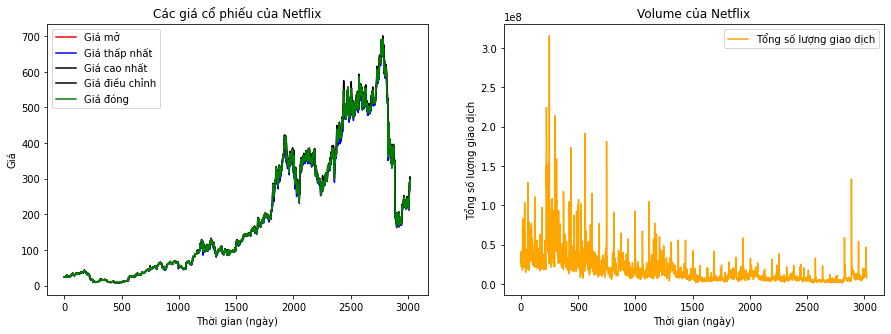

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(df_Netflix.Open.values, color='red', label='Giá mở')
plt.plot(df_Netflix.Low.values, color='blue', label='Giá thấp nhất')
plt.plot(df_Netflix.High.values, color='black', label='Giá cao nhất')
plt.plot(df_Netflix['Adj Close'].values, color='black', label='Giá điều chỉnh')
plt.plot(df_Netflix.Close.values, color='green', label='Giá đóng')
plt.title('Các giá cổ phiếu của Netflix')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Giá')
plt.legend(loc='best')

plt.subplot(1,2,2);
plt.plot(df_Netflix.Volume.values, color='orange', label='Tổng số lượng giao dịch')
plt.title('Volume của Netflix')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Tổng số lượng giao dịch')
plt.legend(loc='best');

Xử lý dữ liệu

In [ ]:
# kiểm tra dữ liệu của các cột của từng mã có ngày nào null hay không
print(df_Google.isnull().sum())
print(df_Apple.isnull().sum())
print(df_Netflix.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


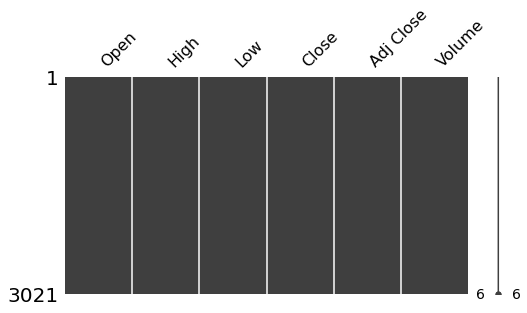

In [ ]:
import missingno as msno
msno.matrix(df_Google, figsize=(8, 4))
# df_Google
# df_Apple
# df_Netflix

# **CỔ PHIẾU NETFLIX**

## Với bộ dữ liệu theo ngày

### **(2) PHÂN TÍCH BÀI TOÁN**

Với giá của phiếu chúng ta sẽ chọn giá điều chỉnh, giá đóng, giá mở,... để dự đoán cho tương lai

In [ ]:
data_netflix = df_Netflix

In [ ]:
data_netflix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,24.850000,24.857143,23.671429,23.910000,23.910000,34553400
2010-11-02,23.812857,24.768572,23.794287,24.515715,24.515715,38203200
2010-11-03,24.662857,24.862858,24.147142,24.494286,24.494286,27377000
2010-11-04,24.764286,24.775715,23.799999,23.974285,23.974285,41218800
2010-11-05,24.405714,24.415714,23.837143,24.014286,24.014286,21994000


In [ ]:
def split_sequences(data_stock, training_set_scaled, time_step, split_percent):
  split = int(split_percent*len(training_set_scaled)) #split percent multiplying by data rows

  X = []
  y = []
  for i in range(time_step + 1, len(training_set_scaled)):
    X.append(training_set_scaled[i-time_step-1:i-1, 0:len(data_stock.columns)]) #dung 60 ngay de du doan ngay 61
    y.append(training_set_scaled[i,0:len(data_stock.columns)]) #lấy tất cả các cột vào set và trừ đi 2 cột

  X_arr, y_arr = np.array(X), np.array(y)

  #Split data
  X_train = X_arr[:split] #(80%) model train input data
  y_train = y_arr[:split] #80%) model train target data
  X_test = X_arr[split:] #(20%) test prediction input data
  y_test = y_arr[split:] #(20%) test prediction compare data

  #Reshaping lại rows/time_step/columns
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2])) #(samples, time-steps, features)
  y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1])) #(samples, time-steps, features)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2])) #(samples, time-steps, features)
  y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1])) #(samples, time-steps, features)

  return X_train, y_train, X_test, y_test

In [ ]:
future_prediction = 14
time_step = 60 #learning step: để giảm lỗi số của kết quả tính toán, giúp chia tập X,y
split_percent = 0.80 #train/test data split (80%)

In [ ]:
training_set = data_netflix.values 

# Normalize dữ liệu
sc = MinMaxScaler(feature_range = [0,1])
training_set_scaled = sc.fit_transform(training_set)

### **(3) XÂY DỰNG CÁC MÔ HÌNH**

In [ ]:
# Hàm tính thời gian train và test
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        return str(thour) + " giờ : "+ str(tmin) +' phút : ' + str(round(tsec,2)) + ' giây' #hour:min:sec

#### 3.1 Mô hình RNN

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# RNN
def rnn():
  regressor_rnn = Sequential()
  regressor_rnn.add(SimpleRNN(units=100, activation='relu',
                        input_shape = (X_train.shape[1], X_train.shape[2])))
  regressor_rnn.add(RepeatVector(6))
  regressor_rnn.add(SimpleRNN(units=100, activation='relu', return_sequences = True))
  regressor_rnn.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

  # Bien dich RNN
  regressor_rnn.compile(optimizer='adam', loss = 'mse', metrics=['mae'])#mean_squared_error
  regressor_rnn.summary()
  return regressor_rnn

In [ ]:
# huấn luyện mô hình
regressor_rnn = rnn()
start_time=timer(None)
history = regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, verbose=1)
mae = history.history['mae']
rnn_mae = round(float(mae[-1]), 5)
time_train_rnn = timer(start_time)
print('Training time -', timer(start_time))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10700     
                                                                 
 repeat_vector (RepeatVector  (None, 6, 100)           0         
 )                                                               
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 time_distributed (TimeDistr  (None, 6, 1)             101       
 ibuted)                                                         
                                                                 
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] - 3

17/17 [==============================] - 0s 6ms/step
Testing time - 0.0 giờ : 0.0 phút : 0.42 giây
(544, 6, 1)


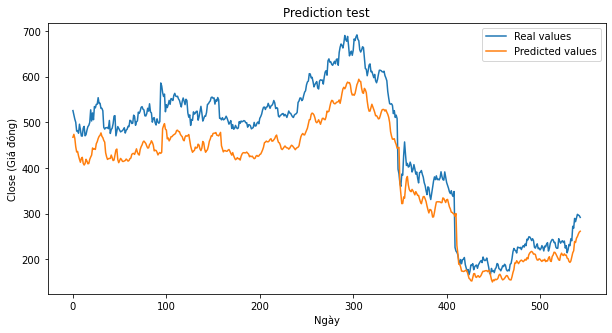

In [ ]:
#Test results
start_time=timer(None)
y_pred = regressor_rnn.predict(X_test)#verbose=1
print('Testing time -', timer(start_time))
time_test_rnn = timer(start_time)
print(y_pred.shape) #(544, 6, 1) reshaped về (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape (544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rnn = sc.inverse_transform(y_test_inv)
y_pred_rnn = sc.inverse_transform(y_pred)

plt.figure(figsize=(10,5))
plt.plot(y_test_rnn[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng RNN và Vẽ đồ thị

In [ ]:
df_netflix_real_pred = data_netflix # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_netflix = df_netflix_real_pred.iloc[-time_step:]
  X_input = df_netflix.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột, reshape convert thành 3D array

  simple_RNN_prediction = regressor_rnn.predict(X_input) # dự đoán cho ngày thứ 61
  simple_RNN_prediction.shape
  simple_RNN_prediction = np.reshape(simple_RNN_prediction, (simple_RNN_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  simple_RNN_prediction = sc.inverse_transform(simple_RNN_prediction)
  print("Simple RNN, Giá đóng cửa cho ngày " + str(day) +"/11/2022:", simple_RNN_prediction[0,1])
  a= simple_RNN_prediction[0,1]
  # Đưa dữ liệu vào bộ train
  df_netflix_predicted = pd.DataFrame(simple_RNN_prediction, columns=df_netflix.columns)
  data = [df_netflix_real_pred, df_netflix_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_netflix_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_netflix_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_netflix_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, verbose=1)


1/1 [==============================] - 0s 249ms/step
Simple RNN, Giá đóng cửa cho ngày 1/11/2022: 290.71014
Epoch 1/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0050 - mae: 0.0370 - val_loss: 0.0344 - val_mae: 0.1334
Epoch 2/5
61/61 [==============================] - 1s 22ms/step - loss: 0.0049 - mae: 0.0372 - val_loss: 0.0345 - val_mae: 0.1406
Epoch 3/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0049 - mae: 0.0369 - val_loss: 0.0344 - val_mae: 0.1316
Epoch 4/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0050 - mae: 0.0370 - val_loss: 0.0344 - val_mae: 0.1333
Epoch 5/5
1/1 [==============================] - 0s 21ms/step
Simple RNN, Giá đóng cửa cho ngày 2/11/2022: 282.8388
Epoch 1/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0049 - mae: 0.0370 - val_loss: 0.0345 - val_mae: 0.1291
Epoch 2/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0049 - mae: 0.0370 - val_loss: 0.0345 - val_mae: 0.1

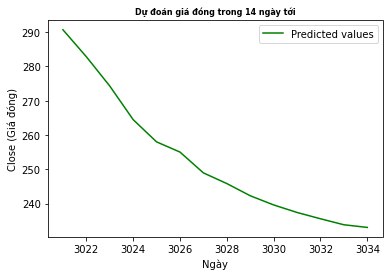

In [ ]:
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

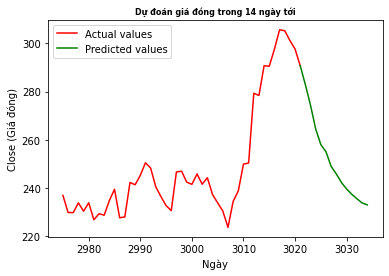

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_netflix_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### **3.2 Mô hình MLP**

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train2 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train2 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
def mlp():
  regressor_mlp = Sequential()
  regressor_mlp.add(Dense(units=100, activation = "relu", input_dim=n_input))
  regressor_mlp.add(Dense(units=100, activation = "relu"))
  regressor_mlp.add(Dense(n_output))
  # Bien dich MLP
  regressor_mlp.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
  regressor_mlp.summary()
  return regressor_mlp

In [ ]:
# huấn luyện mô hình
regressor_mlp = mlp()
start_time=timer(None)
history = regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, verbose = 1)
mae = history.history['mae']
mlp_mae = round(float(mae[-1]), 5)
print('Training time -', timer(start_time))
time_train_mlp = timer(start_time)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               36100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
Total params: 46,806
Trainable params: 46,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] - 1s 6ms/step - loss: 0.0028 - mae: 0.0270 - val_loss: 0.0020 - val_mae: 0.0343
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 9.0493e-04 - mae: 0.0171 - val_loss: 0.0015 - val_mae: 0.0312
Epoch 3/5
61/61 [==============================] - 0

17/17 [==============================] - 0s 2ms/step
Testing time - 0.0 giờ : 0.0 phút : 0.12 giây
(544, 6)


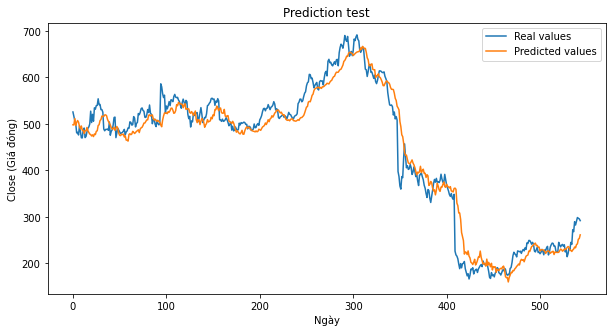

In [ ]:
X_test2 = X_test.reshape((X_test.shape[0], n_input))

#Test results
start_time=timer(None)
y_pred = regressor_mlp.predict(X_test2)
time_test_mlp = timer(start_time)
print('Testing time -', timer(start_time))
print(y_pred.shape) #(544, 6)

#Reshape dữ liệu cho inverse transforming
y_test2 = y_test.reshape((y_test.shape[0], n_output)) #reshape (544, 6)
# y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape (544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_mlp = sc.inverse_transform(y_test2)
y_pred_mlp = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_mlp[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng MLP và Vẽ đồ thị

In [ ]:
df_netflix_real_pred = data_netflix # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán
day = 0
for i in range(future_prediction):
  day += 1
  df_netflix = df_netflix_real_pred.iloc[-time_step:]
  X_input = df_netflix.values
  X_input = sc.fit_transform(X_input) # convert thành 2D array and scale
  X_input = X_input.reshape(1, n_input) # 1 phần tử chứa 540 

  mlp_prediction = regressor_mlp.predict(X_input)
  mlp_prediction = np.reshape(mlp_prediction, (mlp_prediction.shape[0], 6)) #reshaping for (1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  mlp_prediction = sc.inverse_transform(mlp_prediction)
  print("MLP, Giá đóng cửa cho ngày " + str(day) +"/11/2022:", mlp_prediction[0,1])
  
  # Đưa dữ liệu vào bộ train
  df_netflix_predicted = pd.DataFrame(mlp_prediction, columns=df_netflix.columns)
  data = [df_netflix_real_pred, df_netflix_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_netflix_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_netflix_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_netflix_real_pred,training_set_scaled,
                                                  time_step, split_percent)

  # flatten input
  n_input = X_train.shape[1] * X_train.shape[2]
  X_train2 = X_train.reshape((X_train.shape[0], n_input))
  n_output = y_train.shape[2]
  y_train2 = y_train.reshape((y_train.shape[0], n_output))

  # huấn luyện lại mô hình
  regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, verbose= 1)


1/1 [==============================] - 0s 52ms/step
MLP, Giá đóng cửa cho ngày 1/11/2022: 285.68292
Epoch 1/5
61/61 [==============================] - 0s 5ms/step - loss: 7.9028e-04 - mae: 0.0155 - val_loss: 0.0027 - val_mae: 0.0430
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 6.5882e-04 - mae: 0.0136 - val_loss: 8.6338e-04 - val_mae: 0.0216
Epoch 3/5
61/61 [==============================] - 0s 3ms/step - loss: 5.7507e-04 - mae: 0.0122 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 4/5
61/61 [==============================] - 0s 4ms/step - loss: 5.5323e-04 - mae: 0.0121 - val_loss: 0.0028 - val_mae: 0.0452
Epoch 5/5
1/1 [==============================] - 0s 20ms/step
MLP, Giá đóng cửa cho ngày 2/11/2022: 289.63165
Epoch 1/5
61/61 [==============================] - 0s 4ms/step - loss: 5.4846e-04 - mae: 0.0119 - val_loss: 0.0013 - val_mae: 0.0288
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 4.8702e-04 - mae: 0.0113 - val_loss: 0.0015 - val_

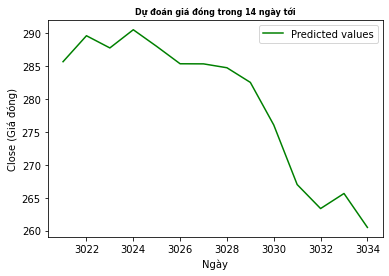

In [ ]:
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

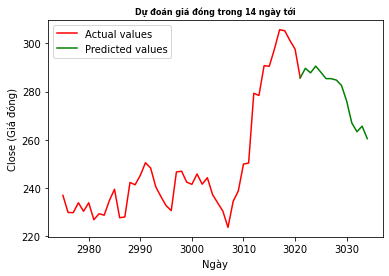

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_netflix_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### **3.3 Mô hình Random Forest**

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)
# (2416, 60, 6), (2416, 1, 6), (544, 60, 6), (544, 1, 6)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2] 
X_train3 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train3 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor() # không parameter để test overfitting
start_time=timer(None)
regressor_rf.fit(X_train3, y_train3)
time_train_rf = timer(start_time)
print('Training time -', timer(start_time))

Training time - 0.0 giờ : 0.0 phút : 59.88 giây


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test3 = X_test.reshape((X_test.shape[0], n_input))
y_test3 = y_test.reshape((y_test.shape[0], n_output))
#Test results
start_time=timer(None)
y_pred = regressor_rf.predict(X_test3)

time_test_rf = timer(start_time)
rf_mae = mean_absolute_error(y_test3, y_pred)
print('Testing time -', timer(start_time))
print('Mean Absolute Error:', mean_absolute_error(y_test3, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test3, y_pred))

Testing time - 0.0 giờ : 0.0 phút : 0.02 giây
Mean Absolute Error: 0.04828602000631801
Mean Squared Error: 0.005697903057360247


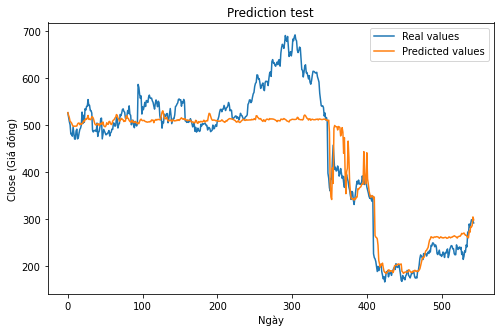

In [ ]:
#Reversing transform để có được giá trị dữ liệu thích hợp
y_test_rf = sc.inverse_transform(y_test3)
y_pred_rf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3  là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng Random Forest và Vẽ đồ thị

In [ ]:
df_netflix_real_pred = data_netflix  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
df_netflix_real_pred.shape

(3021, 6)

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_netflix_pred = df_netflix_real_pred.iloc[-time_step:]
  X_input = df_netflix_pred.values
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = X_input.reshape(1, n_input) # 1 phần tử chứa 540 
  print(X_input.shape)
  rf_prediction = regressor_rf.predict(X_input)
  # y_pred = regressor_rf.predict(X_test3)
  rf_prediction = np.reshape(rf_prediction, (rf_prediction.shape[0], 6)) #reshaping for (1, 6)
  #Reversing transform to get proper data values
  rf_prediction = sc.inverse_transform(rf_prediction)
  print("Random Forest, Giá đóng cho ngày " + str(day) +"/11/2022:", rf_prediction[0,1])
  
  # Đưa dữ liệu vào bộ train
  df_netflix_predicted = pd.DataFrame(rf_prediction, columns=df_netflix.columns)
  data = [df_netflix_real_pred, df_netflix_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_netflix_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_netflix_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_netflix_real_pred,training_set_scaled,
                                                  time_step, split_percent)

  # flatten input
  n_input = X_train.shape[1] * X_train.shape[2]
  X_train3 = X_train.reshape((X_train.shape[0], n_input))
  n_output = y_train.shape[2]
  y_train3 = y_train.reshape((y_train.shape[0], n_output))

  # huấn luyện lại mô hình
  regressor_rf.fit(X_train3, y_train3)


(1, 360)
Random Forest, Giá đóng cho ngày 1/11/2022: 272.8572033685084
(1, 360)
Random Forest, Giá đóng cho ngày 2/11/2022: 271.4650649655954
(1, 360)
Random Forest, Giá đóng cho ngày 3/11/2022: 271.3853592784138
(1, 360)
Random Forest, Giá đóng cho ngày 4/11/2022: 271.6003040509336
(1, 360)
Random Forest, Giá đóng cho ngày 5/11/2022: 270.9632868659022
(1, 360)
Random Forest, Giá đóng cho ngày 6/11/2022: 270.81265052943434
(1, 360)
Random Forest, Giá đóng cho ngày 7/11/2022: 270.67148662927985
(1, 360)
Random Forest, Giá đóng cho ngày 8/11/2022: 270.88671509785036
(1, 360)
Random Forest, Giá đóng cho ngày 9/11/2022: 270.1782228973375
(1, 360)
Random Forest, Giá đóng cho ngày 10/11/2022: 270.2615118192442
(1, 360)
Random Forest, Giá đóng cho ngày 11/11/2022: 270.0583454818305
(1, 360)
Random Forest, Giá đóng cho ngày 12/11/2022: 270.0771838470766
(1, 360)
Random Forest, Giá đóng cho ngày 13/11/2022: 270.05230254320514
(1, 360)
Random Forest, Giá đóng cho ngày 14/11/2022: 269.68210951231

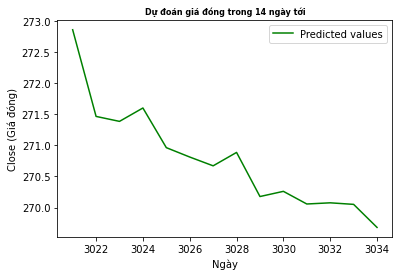

In [ ]:
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

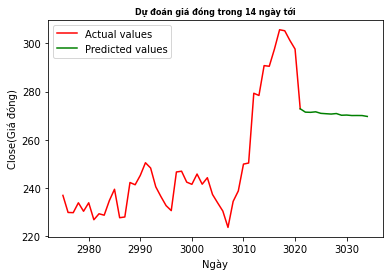

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_netflix_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close(Giá đóng)")
plt.legend()

#### 3.4 Đánh giá độ đo MAE và so sánh

In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Mean Absolute Error': [rnn_mae, mlp_mae, rf_mae]})
compare.sort_values(by='Mean Absolute Error', ascending=True)

,Model,Mean Absolute Error
1,MLP,0.013060
0,RNN,0.037170
2,Random Forest,0.048286


#### 3.5 Thời gian Training và Testing

In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Training time': [time_train_rnn, time_train_mlp,  time_train_rf]})
compare.sort_values(by='Training time', ascending=True)

,Model,Training time
1,MLP,0.0 giờ : 0.0 phút : 1.76 giây
2,Random Forest,0.0 giờ : 0.0 phút : 59.88 giây
0,RNN,0.0 giờ : 0.0 phút : 8.28 giây


In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Testing time': [time_test_rnn, time_test_mlp,  time_test_rf]})
compare.sort_values(by='Testing time', ascending=True)

,Model,Testing time
2,Random Forest,0.0 giờ : 0.0 phút : 0.02 giây
1,MLP,0.0 giờ : 0.0 phút : 0.12 giây
0,RNN,0.0 giờ : 0.0 phút : 0.42 giây


### **(4) XỬ LÝ OVERFITTING VÀ SO SÁNH**

In [ ]:
early_stopping = EarlyStopping(patience=2, min_delta=0.0001, monitor="val_loss", verbose=1)

#### 4.1 Mô hình RNN

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
regressor_rnn = Sequential()
regressor_rnn.add(SimpleRNN(units=100, activation='relu',
                        input_shape = (X_train.shape[1], X_train.shape[2])))
regressor_rnn.add(Dropout(0.2))
regressor_rnn.add(RepeatVector(6))
regressor_rnn.add(SimpleRNN(units=100, activation='relu', return_sequences = True))
regressor_rnn.add(Dropout(0.2))
regressor_rnn.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

# Bien dich RNN
regressor_rnn.compile(optimizer='adam', loss = 'mse', metrics=['mae'])#mean_squared_error
regressor_rnn.summary()

# huấn luyện mô hình RNN với early stopping
regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, callbacks=[early_stopping],verbose=1)
# callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]) validation_split=0.2 verbose=1

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100)               10700     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 dropout_1 (Dropout)         (None, 6, 100)            0         
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 1)             101       
 tributed)                                            

17/17 [==============================] - 0s 8ms/step
(544, 6, 1)


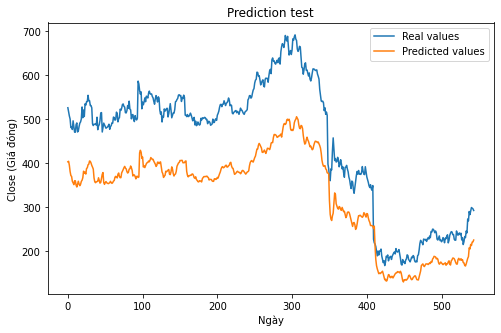

In [ ]:
#Test results
y_pred = regressor_rnn.predict(X_test)#verbose=1
print(y_pred.shape) #(544, 6, 1) -  reshaped thành (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rnn_ovf = sc.inverse_transform(y_test_inv)
y_pred_rnn_ovf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rnn_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

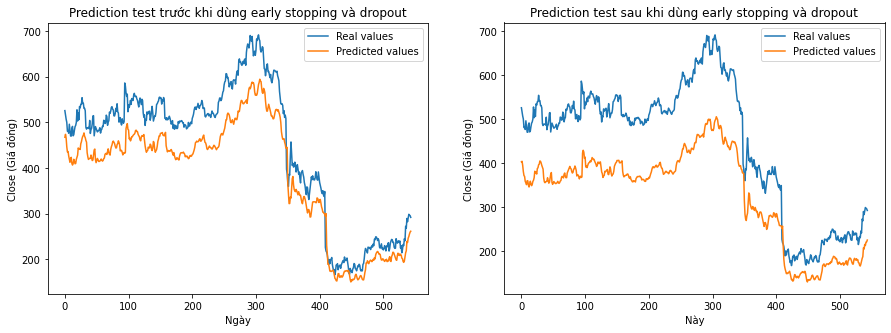

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_rnn[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test trước khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_rnn_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test sau khi dùng early stopping và dropout')
plt.xlabel('Này')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

#### 4.2 Mô hình MLP

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train2 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train2 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
regressor_mlp = Sequential()
regressor_mlp.add(Dense(units=100, activation = "relu", input_dim=n_input))
regressor_mlp.add(Dropout(0.2))
regressor_mlp.add(Dense(units=100, activation = "relu"))
regressor_mlp.add(Dropout(0.2))
regressor_mlp.add(Dense(n_output))
# Bien dich MLP
regressor_mlp.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
regressor_mlp.summary()
# huấn luyện mô hình
regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               36100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 46,806
Trainable params: 46,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] -

17/17 [==============================] - 0s 2ms/step
(544, 6)


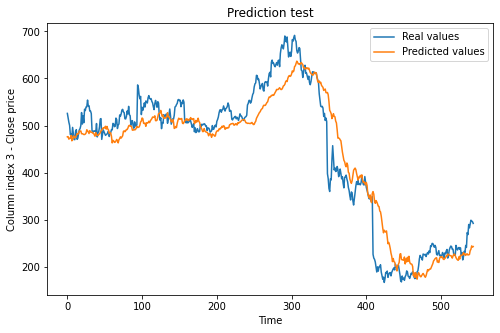

In [ ]:
# regressor.fit(X_train2, y_train, epochs = 5, batch_size = 32)
X_test2 = X_test.reshape((X_test.shape[0], n_input))

#Test results
y_pred = regressor_mlp.predict(X_test2)
print(y_pred.shape) #(544, 6)

#Reshape dữ liệu cho inverse transforming
y_test2 = y_test.reshape((y_test.shape[0], n_output)) #reshape (544, 6)
# y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_mlp_ovf = sc.inverse_transform(y_test2)
y_pred_mlp_ovf = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_mlp_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Time')
#plt.ylim([15, 28])
plt.ylabel('Column index 3 - Close price') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

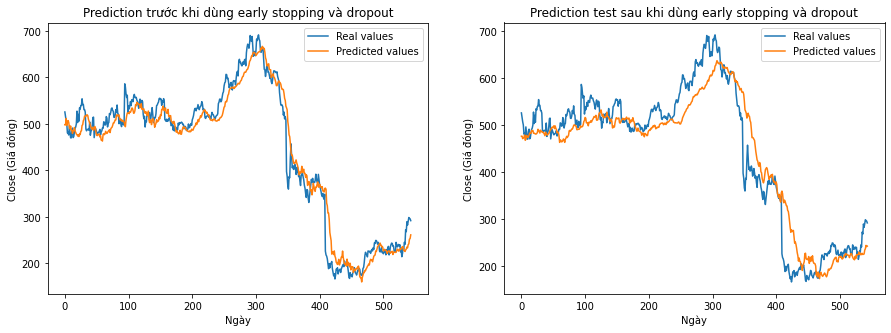

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_mlp[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction trước khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_mlp_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test sau khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

#### 4.3 Mô hình Random forest

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train3 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train3 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
# Tìm tham số tốt nhất để xử lý overfitting
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'bootstrap': bootstrap}
          
rfr = RandomForestRegressor(random_state = 1)

rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, 
                                scoring='neg_mean_absolute_error', cv = 3, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train3, y_train3)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print(rfr_random.best_params_)

{'n_estimators': 5, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# regressor_rf = RandomForestRegressor(n_estimators=50, random_state=42, 
#                                      min_samples_split=2, 
#                                      min_samples_leaf=1, max_depth=10, 
#                                      bootstrap=True)# có thể sử dụng nhiều tham số để loại bỏ phần thừa một cách dễ dàng
regressor_rf = RandomForestRegressor(n_estimators= 5, max_features= 'auto', 
                                     max_depth= None, bootstrap= True) 
regressor_rf.fit(X_train3, y_train3)

RandomForestRegressor(n_estimators=5)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test3 = X_test.reshape((X_test.shape[0], n_input))
y_test3 = y_test.reshape((y_test.shape[0], n_output)) # (544, 1, 6) -> (544, 6)
#Test results
y_pred = regressor_rf.predict(X_test3)
print('Mean Absolute Error:', mean_absolute_error(y_test3, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test3, y_pred))

Mean Absolute Error: 0.04922935807860237
Mean Squared Error: 0.006040808370676922


In [ ]:
y_test.shape

(544, 1, 6)

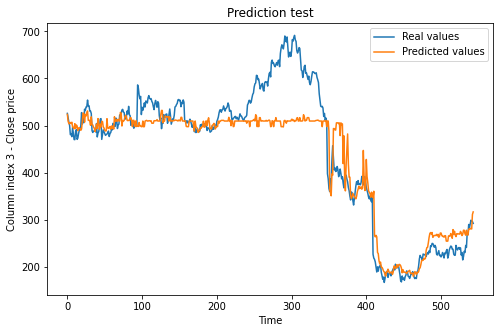

In [ ]:
#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rf_ovf = sc.inverse_transform(y_test3)
y_pred_rf_ovf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rf_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rf_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Time')
plt.ylabel('Column index 3 - Close price') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

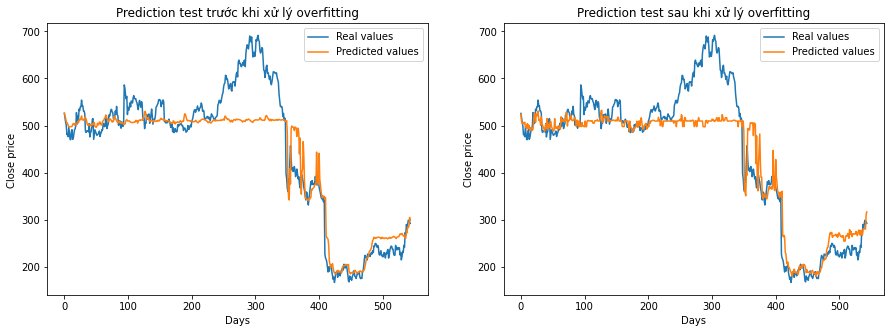

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_rf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_rf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test trước khi xử lý overfitting')
plt.xlabel('Days')
plt.ylabel('Close price ')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_rf_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_rf_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test sau khi xử lý overfitting')
plt.xlabel('Days')
plt.ylabel('Close price')
#plt.ylim([15, 28])
plt.legend()

###(5) TÌM ĐẶC TRƯNG QUAN TRỌNG NHẤT

In [ ]:
# Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
df_netflix = df_netflix
X = df_netflix.drop(['Close'], axis=1)
y = df_netflix['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
reg.feature_importances_

array([0.22110774, 0.2447686 , 0.28249647, 0.24960021, 0.00202698])

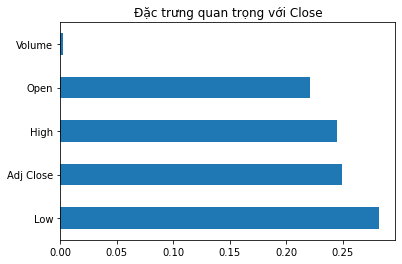

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh', title='Đặc trưng quan trọng với Close')
plt.show()

In [ ]:
feat_importances

Open         0.221108
High         0.244769
Low          0.282496
Adj Close    0.249600
Volume       0.002027
dtype: float64

In [ ]:
feat_importances[feat_importances == max(feat_importances)].index

Index(['Low'], dtype='object')

### (6) MÔ HÌNH DEEP LEARNING

#### 6.1 Mô hình LSTM

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# LSTM
def lstm():
  regressor_lstm = Sequential()
  regressor_lstm.add(LSTM(units=100,input_shape = (X_train.shape[1], X_train.shape[2])))
  regressor_lstm.add(Dropout(0.2))
  regressor_lstm.add(RepeatVector(6))
  regressor_lstm.add(LSTM(units=100, return_sequences = True))
  regressor_lstm.add(Dropout(0.2))
  regressor_lstm.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

  # Bien dich LSTM
  regressor_lstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
  regressor_lstm.summary()
  return regressor_lstm

In [ ]:
# huấn luyện mô hình
regressor_lstm = lstm()
regressor_lstm.fit(X_train, y_train, epochs = 5, batch_size = 32,  shuffle = False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42800     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 6, 100)            80400     
                                                                 
 dropout_5 (Dropout)         (None, 6, 100)            0         
                                                                 
 time_distributed_2 (TimeDis  (None, 6, 1)             101       
 tributed)                                            

17/17 [==============================] - 1s 18ms/step
(544, 6, 1)


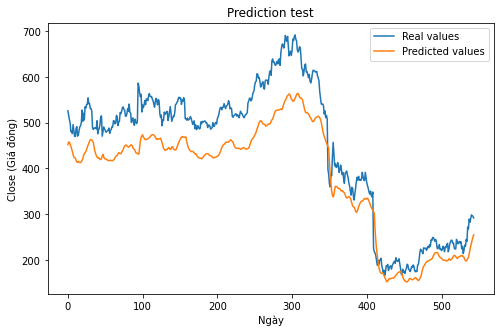

In [ ]:
#Test results
y_pred = regressor_lstm.predict(X_test)
print(y_pred.shape) #(544, 6, 1) - reshape thành (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_inv = sc.inverse_transform(y_test_inv)
y_pred_lstm = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_inv[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_lstm[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo và Vẽ đồ thị

In [ ]:
df_netflix_real_pred = data_netflix  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_netflix = df_netflix_real_pred.iloc[-time_step:]
  X_input = df_netflix.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột, reshape convert thành 3D array

  LSTM_prediction = regressor_lstm.predict(X_input)
  LSTM_prediction.shape
  LSTM_prediction = np.reshape(LSTM_prediction, (LSTM_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  LSTM_prediction = sc.inverse_transform(LSTM_prediction)
  print("LSTM,  Giá đóng cửa cho ngày " + str(day) +"/11/2022:", LSTM_prediction[0,1])

  # Đưa dữ liệu vào bộ train
  df_netflix_predicted = pd.DataFrame(LSTM_prediction, columns=df_netflix.columns)
  data = [df_netflix_real_pred, df_netflix_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_netflix_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_netflix_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_netflix_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_lstm.fit(X_train, y_train, epochs = 5, batch_size = 32)


1/1 [==============================] - 1s 827ms/step
LSTM,  Giá đóng cửa cho ngày 1/11/2022: 284.70496
Epoch 1/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0113 - mae: 0.0568
Epoch 2/5
76/76 [==============================] - 4s 50ms/step - loss: 0.0112 - mae: 0.0564
Epoch 3/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0112 - mae: 0.0565
Epoch 4/5
76/76 [==============================] - 4s 48ms/step - loss: 0.0111 - mae: 0.0569
Epoch 5/5
1/1 [==============================] - 0s 31ms/step
LSTM,  Giá đóng cửa cho ngày 2/11/2022: 284.03244
Epoch 1/5
76/76 [==============================] - 4s 48ms/step - loss: 0.0111 - mae: 0.0568
Epoch 2/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0111 - mae: 0.0568
Epoch 3/5
76/76 [==============================] - 4s 48ms/step - loss: 0.0111 - mae: 0.0568
Epoch 4/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0111 - mae: 0.0568
Epoch 5/5
1/1 [==========================

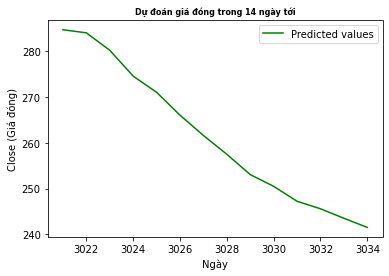

In [ ]:
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

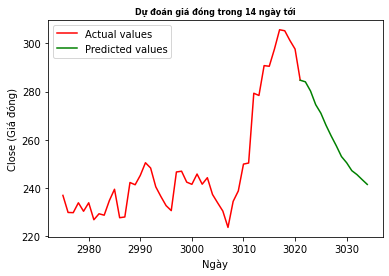

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_netflix_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### Mô hình BiLSTM 

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_netflix,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
def bilstm():
    regressor_bilstm = Sequential()
    # Input layer
    regressor_bilstm.add(Bidirectional(
              LSTM(units = 100), input_shape=(X_train.shape[1], X_train.shape[2])))
    regressor_bilstm.add(RepeatVector(6))
    # Hidden layer
    regressor_bilstm.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
    regressor_bilstm.add(TimeDistributed(Dense(1)))
    #Compile model
    regressor_bilstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
    regressor_bilstm.summary()

    return regressor_bilstm

In [ ]:
regressor_bilstm = bilstm()
start_time=timer(None)
regressor_bilstm.fit( X_train, y_train, epochs = 5, batch_size = 32)
timer(start_time)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              85600     
 l)                                                              
                                                                 
 repeat_vector_3 (RepeatVect  (None, 6, 200)           0         
 or)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 6, 200)           240800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 6, 1)             201       
 tributed)                                                       
                                                                 
Total params: 326,601
Trainable params: 326,601
Non-tr

'0.0 giờ : 0.0 phút : 43.28 giây'

17/17 [==============================] - 2s 25ms/step
(544, 6, 1)


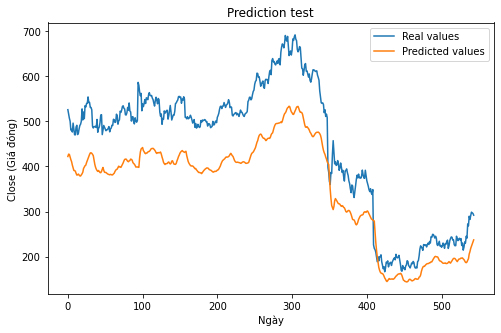

In [ ]:
#Test results
y_pred = regressor_bilstm.predict(X_test)
print(y_pred.shape) #(544, 6, 1) - reshape thành(544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_inv = sc.inverse_transform(y_test_inv)
y_pred_bilstm = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_inv[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_bilstm[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo và Vẽ đồ thị

In [ ]:
df_netflix_real_pred = data_netflix  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_netflix = df_netflix_real_pred.iloc[-time_step:]
  X_input = df_netflix.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột                    # reshaping : converting to 3D array

  biLSTM_prediction = regressor_bilstm.predict(X_input)
  biLSTM_prediction.shape
  biLSTM_prediction = np.reshape(biLSTM_prediction, (biLSTM_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  biLSTM_prediction = sc.inverse_transform(biLSTM_prediction)
  print("BiLSTM, Giá đóng cho ngày " + str(day) +"/11/2022:", biLSTM_prediction[0,1])

  # Đưa dữ liệu vào bộ train
  df_netflix_predicted = pd.DataFrame(biLSTM_prediction, columns=df_netflix.columns)
  data = [df_netflix_real_pred, df_netflix_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_netflix_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_netflix_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_netflix_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_bilstm.fit(X_train, y_train, epochs = 5, batch_size = 32)


1/1 [==============================] - 2s 2s/step
BiLSTM, Giá đóng cho ngày 1/11/2022: 286.1126
Epoch 1/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0109 - mae: 0.0567
Epoch 2/5
76/76 [==============================] - 7s 87ms/step - loss: 0.0109 - mae: 0.0567
Epoch 3/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0109 - mae: 0.0567
Epoch 4/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0109 - mae: 0.0567
Epoch 5/5
1/1 [==============================] - 0s 36ms/step
BiLSTM, Giá đóng cho ngày 2/11/2022: 286.15048
Epoch 1/5
76/76 [==============================] - 7s 90ms/step - loss: 0.0109 - mae: 0.0565
Epoch 2/5
76/76 [==============================] - 7s 90ms/step - loss: 0.0109 - mae: 0.0565
Epoch 3/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0109 - mae: 0.0565
Epoch 4/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0109 - mae: 0.0567
Epoch 5/5
1/1 [==============================] - 0s

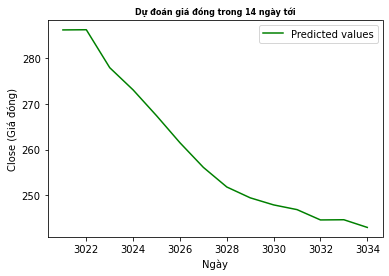

In [ ]:
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

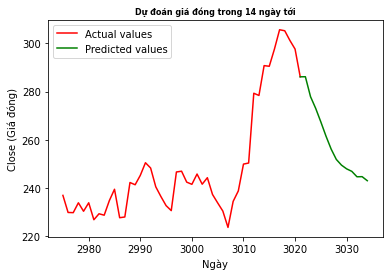

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_netflix_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_netflix_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

# **CỔ PHIẾU GOOGLE**

## Với bộ dữ liệu theo ngày

### **(2) PHÂN TÍCH BÀI TOÁN**

Với giá của phiếu chúng ta sẽ chọn giá điều chỉnh, giá đóng, giá mở,... để dự đoán cho tương lai

In [ ]:
data_google = df_Google

In [ ]:
data_google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,15.335768,15.458558,15.223190,15.317586,15.317586,123946848
2010-11-02,15.408993,15.442119,15.307125,15.332530,15.332530,80203500
2010-11-03,15.379853,15.487698,15.280226,15.446602,15.446602,135726838
2010-11-04,15.557686,15.689193,15.494423,15.548471,15.548471,143367369
2010-11-05,15.521322,15.578857,15.469766,15.568645,15.568645,70892731


In [ ]:
def split_sequences(data_stock, training_set_scaled, time_step, split_percent):
  split = int(split_percent*len(training_set_scaled)) #split percent multiplying by data rows

  X = []
  y = []
  for i in range(time_step + 1, len(training_set_scaled)):
    X.append(training_set_scaled[i-time_step-1:i-1, 0:len(data_stock.columns)]) #dung 60 ngay de du doan ngay 61
    y.append(training_set_scaled[i,0:len(data_stock.columns)]) #lấy tất cả các cột vào set và trừ đi 2 cột

  X_arr, y_arr = np.array(X), np.array(y)

  #Split data
  X_train = X_arr[:split] #(80%) model train input data
  y_train = y_arr[:split] #80%) model train target data
  X_test = X_arr[split:] #(20%) test prediction input data
  y_test = y_arr[split:] #(20%) test prediction compare data

  #Reshaping lại rows/time_step/columns
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2])) #(samples, time-steps, features)
  y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1])) #(samples, time-steps, features)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2])) #(samples, time-steps, features)
  y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1])) #(samples, time-steps, features)

  return X_train, y_train, X_test, y_test

In [ ]:
future_prediction = 14
time_step = 60 #learning step: để giảm lỗi số của kết quả tính toán, giúp chia tập X,y
split_percent = 0.80 #train/test data split (80%)

In [ ]:
training_set = data_google.values 

# Normalize dữ liệu
sc = MinMaxScaler(feature_range = [0,1])
training_set_scaled = sc.fit_transform(training_set)

### **(3) XÂY DỰNG CÁC MÔ HÌNH**

In [ ]:
# Hàm tính thời gian train và test
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        return str(thour) + " giờ : "+ str(tmin) +' phút : ' + str(round(tsec,2)) + ' giây' #hour:min:sec

#### 3.1 Mô hình RNN

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# RNN
def rnn():
  regressor_rnn = Sequential()
  regressor_rnn.add(SimpleRNN(units=100, activation='relu',
                        input_shape = (X_train.shape[1], X_train.shape[2])))
  regressor_rnn.add(RepeatVector(6))
  regressor_rnn.add(SimpleRNN(units=100, activation='relu', return_sequences = True))
  regressor_rnn.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

  # Bien dich RNN
  regressor_rnn.compile(optimizer='adam', loss = 'mse', metrics=['mae'])#mean_squared_error
  regressor_rnn.summary()
  return regressor_rnn

In [ ]:
# huấn luyện mô hình
regressor_rnn = rnn()
start_time=timer(None)
history = regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, verbose=1)
mae = history.history['mae']
rnn_mae = round(float(mae[-1]), 5)
time_train_rnn = timer(start_time)
print('Training time -', timer(start_time))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 100)               10700     
                                                                 
 repeat_vector_4 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 time_distributed_4 (TimeDis  (None, 6, 1)             101       
 tributed)                                                       
                                                                 
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] -

17/17 [==============================] - 0s 6ms/step
Testing time - 0.0 giờ : 0.0 phút : 0.43 giây
(544, 6, 1)


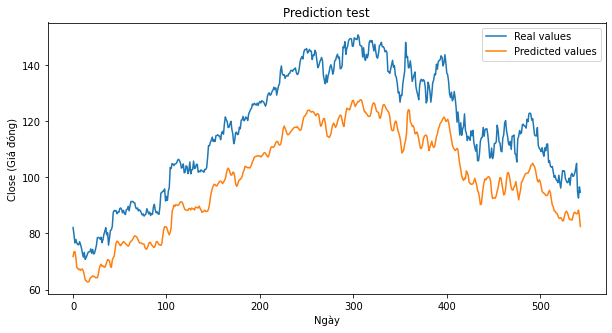

In [ ]:
#Test results
start_time=timer(None)
y_pred = regressor_rnn.predict(X_test)#verbose=1
print('Testing time -', timer(start_time))
time_test_rnn = timer(start_time)
print(y_pred.shape) #(544, 6, 1) reshaped về (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape (544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rnn = sc.inverse_transform(y_test_inv)
y_pred_rnn = sc.inverse_transform(y_pred)

plt.figure(figsize=(10,5))
plt.plot(y_test_rnn[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng RNN và Vẽ đồ thị

In [ ]:
df_google_real_pred = data_google # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_google = df_google_real_pred.iloc[-time_step:]
  X_input = df_google.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột, reshape convert thành 3D array

  simple_RNN_prediction = regressor_rnn.predict(X_input) # dự đoán cho ngày thứ 61
  simple_RNN_prediction.shape
  simple_RNN_prediction = np.reshape(simple_RNN_prediction, (simple_RNN_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  simple_RNN_prediction = sc.inverse_transform(simple_RNN_prediction)
  print("Simple RNN, Giá đóng cửa cho ngày " + str(day) +"/11/2022:", simple_RNN_prediction[0,1])
  a= simple_RNN_prediction[0,1]
  # Đưa dữ liệu vào bộ train
  df_google_predicted = pd.DataFrame(simple_RNN_prediction, columns=df_google.columns)
  data = [df_google_real_pred, df_google_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_google_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_google_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_google_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, verbose=1)


1/1 [==============================] - 0s 252ms/step
Simple RNN, Giá đóng cửa cho ngày 1/11/2022: 98.07713
Epoch 1/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0040 - mae: 0.0378 - val_loss: 0.0136 - val_mae: 0.0914
Epoch 2/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0040 - mae: 0.0380 - val_loss: 0.0135 - val_mae: 0.0872
Epoch 3/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0040 - mae: 0.0378 - val_loss: 0.0134 - val_mae: 0.0866
Epoch 4/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0040 - mae: 0.0380 - val_loss: 0.0134 - val_mae: 0.0855
Epoch 5/5
1/1 [==============================] - 0s 19ms/step
Simple RNN, Giá đóng cửa cho ngày 2/11/2022: 97.64419
Epoch 1/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0040 - mae: 0.0377 - val_loss: 0.0134 - val_mae: 0.0850
Epoch 2/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0040 - mae: 0.0379 - val_loss: 0.0135 - val_mae: 0.08

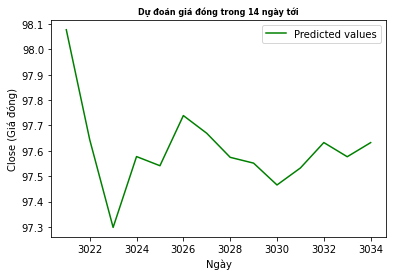

In [ ]:
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

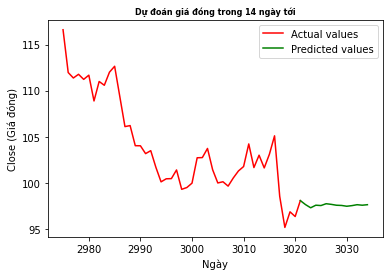

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_google_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### **3.2 Mô hình MLP**

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train2 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train2 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
def mlp():
  regressor_mlp = Sequential()
  regressor_mlp.add(Dense(units=100, activation = "relu", input_dim=n_input))
  regressor_mlp.add(Dense(units=100, activation = "relu"))
  regressor_mlp.add(Dense(n_output))
  # Bien dich MLP
  regressor_mlp.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
  regressor_mlp.summary()
  return regressor_mlp

In [ ]:
# huấn luyện mô hình
regressor_mlp = mlp()
start_time=timer(None)
history = regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, verbose = 1)
mae = history.history['mae']
mlp_mae = round(float(mae[-1]), 5)
print('Training time -', timer(start_time))
time_train_mlp = timer(start_time)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               36100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 6)                 606       
                                                                 
Total params: 46,806
Trainable params: 46,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] - 1s 6ms/step - loss: 0.0025 - mae: 0.0271 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 9.5726e-04 - mae: 0.0163 - val_loss: 0.0012 - val_mae: 0.0294
Epoch 3/5
61/61 [==============================] - 0

17/17 [==============================] - 0s 2ms/step
Testing time - 0.0 giờ : 0.0 phút : 0.18 giây
(544, 6)


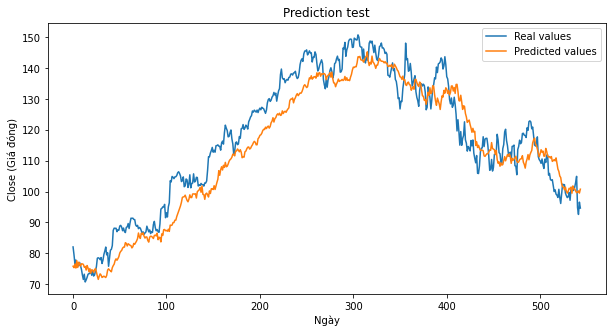

In [ ]:
X_test2 = X_test.reshape((X_test.shape[0], n_input))

#Test results
start_time=timer(None)
y_pred = regressor_mlp.predict(X_test2)
time_test_mlp = timer(start_time)
print('Testing time -', timer(start_time))
print(y_pred.shape) #(544, 6)

#Reshape dữ liệu cho inverse transforming
y_test2 = y_test.reshape((y_test.shape[0], n_output)) #reshape (544, 6)
# y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape (544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_mlp = sc.inverse_transform(y_test2)
y_pred_mlp = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_mlp[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng MLP và Vẽ đồ thị

In [ ]:
df_google_real_pred = data_google  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán
day = 0
for i in range(future_prediction):
  day += 1
  df_google = df_google_real_pred.iloc[-time_step:]
  X_input = df_google.values
  X_input = sc.fit_transform(X_input) # convert thành 2D array and scale
  X_input = X_input.reshape(1, n_input) # 1 phần tử chứa 540 

  mlp_prediction = regressor_mlp.predict(X_input)
  mlp_prediction = np.reshape(mlp_prediction, (mlp_prediction.shape[0], 6)) #reshaping for (1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  mlp_prediction = sc.inverse_transform(mlp_prediction)
  print("MLP, Giá đóng cửa cho ngày " + str(day) +"/11/2022:", mlp_prediction[0,1])
  
  # Đưa dữ liệu vào bộ train
  df_google_predicted = pd.DataFrame(mlp_prediction, columns=df_google.columns)
  data = [df_google_real_pred, df_google_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_google_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_google_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_google_real_pred,training_set_scaled,
                                                  time_step, split_percent)

  # flatten input
  n_input = X_train.shape[1] * X_train.shape[2]
  X_train2 = X_train.reshape((X_train.shape[0], n_input))
  n_output = y_train.shape[2]
  y_train2 = y_train.reshape((y_train.shape[0], n_output))

  # huấn luyện lại mô hình
  regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, verbose= 1)


1/1 [==============================] - 0s 70ms/step
MLP, Giá đóng cửa cho ngày 1/11/2022: 104.19821
Epoch 1/5
61/61 [==============================] - 0s 7ms/step - loss: 7.8132e-04 - mae: 0.0132 - val_loss: 5.7798e-04 - val_mae: 0.0180
Epoch 2/5
61/61 [==============================] - 0s 6ms/step - loss: 7.7075e-04 - mae: 0.0132 - val_loss: 5.0736e-04 - val_mae: 0.0171
Epoch 3/5
61/61 [==============================] - 0s 6ms/step - loss: 7.7103e-04 - mae: 0.0134 - val_loss: 5.6119e-04 - val_mae: 0.0170
Epoch 4/5
61/61 [==============================] - 0s 5ms/step - loss: 7.4549e-04 - mae: 0.0125 - val_loss: 7.9887e-04 - val_mae: 0.0194
Epoch 5/5
1/1 [==============================] - 0s 16ms/step
MLP, Giá đóng cửa cho ngày 2/11/2022: 102.40211
Epoch 1/5
61/61 [==============================] - 0s 4ms/step - loss: 6.8881e-04 - mae: 0.0117 - val_loss: 6.4444e-04 - val_mae: 0.0180
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 7.0986e-04 - mae: 0.0120 - val_los

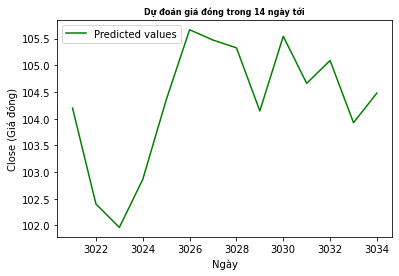

In [ ]:
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

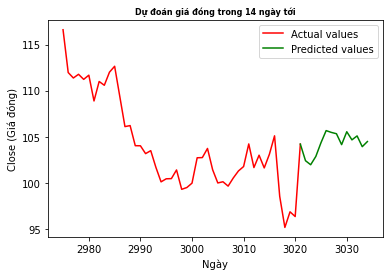

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_google_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### **3.3 Mô hình Random Forest**

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)
# (2416, 60, 6), (2416, 1, 6), (544, 60, 6), (544, 1, 6)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2] 
X_train3 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train3 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor() # không parameter để test overfitting
start_time=timer(None)
regressor_rf.fit(X_train3, y_train3)
time_train_rf = timer(start_time)
print('Training time -', timer(start_time))

Training time - 0.0 giờ : 0.0 phút : 56.42 giây


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test3 = X_test.reshape((X_test.shape[0], n_input))
y_test3 = y_test.reshape((y_test.shape[0], n_output))
#Test results
start_time=timer(None)
y_pred = regressor_rf.predict(X_test3)

time_test_rf = timer(start_time)
rf_mae = mean_absolute_error(y_test3, y_pred)
print('Testing time -', timer(start_time))
print('Mean Absolute Error:', mean_absolute_error(y_test3, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test3, y_pred))

Testing time - 0.0 giờ : 0.0 phút : 0.02 giây
Mean Absolute Error: 0.21648127995621325
Mean Squared Error: 0.07004836633854304


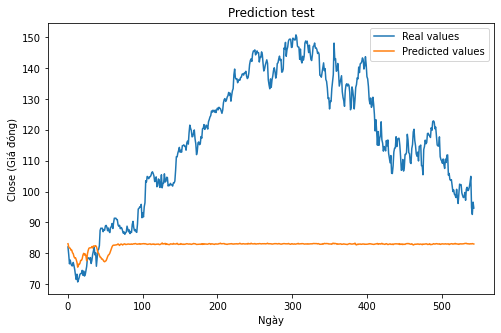

In [ ]:
#Reversing transform để có được giá trị dữ liệu thích hợp
y_test_rf = sc.inverse_transform(y_test3)
y_pred_rf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3  là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng Random Forest và Vẽ đồ thị

In [ ]:
df_google_real_pred = data_google  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
df_google_real_pred.shape

(3021, 6)

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_google_pred = df_google_real_pred.iloc[-time_step:]
  X_input = df_google_pred.values
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = X_input.reshape(1, n_input) # 1 phần tử chứa 540 
  print(X_input.shape)
  rf_prediction = regressor_rf.predict(X_input)
  # y_pred = regressor_rf.predict(X_test3)
  rf_prediction = np.reshape(rf_prediction, (rf_prediction.shape[0], 6)) #reshaping for (1, 6)
  #Reversing transform to get proper data values
  rf_prediction = sc.inverse_transform(rf_prediction)
  print("Random Forest, Giá đóng cho ngày " + str(day) +"/11/2022:", rf_prediction[0,1])
  
  # Đưa dữ liệu vào bộ train
  df_google_predicted = pd.DataFrame(rf_prediction, columns=df_google.columns)
  data = [df_google_real_pred, df_google_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_google_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_google_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_google_real_pred,training_set_scaled,
                                                  time_step, split_percent)

  # flatten input
  n_input = X_train.shape[1] * X_train.shape[2]
  X_train3 = X_train.reshape((X_train.shape[0], n_input))
  n_output = y_train.shape[2]
  y_train3 = y_train.reshape((y_train.shape[0], n_output))

  # huấn luyện lại mô hình
  regressor_rf.fit(X_train3, y_train3)


(1, 360)
Random Forest, Giá đóng cho ngày 1/11/2022: 98.24037090878254
(1, 360)
Random Forest, Giá đóng cho ngày 2/11/2022: 98.42357961491224
(1, 360)
Random Forest, Giá đóng cho ngày 3/11/2022: 98.48151376523005
(1, 360)
Random Forest, Giá đóng cho ngày 4/11/2022: 98.84710497222923
(1, 360)
Random Forest, Giá đóng cho ngày 5/11/2022: 99.08025663869373
(1, 360)
Random Forest, Giá đóng cho ngày 6/11/2022: 99.13466974535312
(1, 360)
Random Forest, Giá đóng cho ngày 7/11/2022: 99.05836145672336
(1, 360)
Random Forest, Giá đóng cho ngày 8/11/2022: 98.92558003029971
(1, 360)
Random Forest, Giá đóng cho ngày 9/11/2022: 98.82591654176375
(1, 360)
Random Forest, Giá đóng cho ngày 10/11/2022: 99.12498888619956
(1, 360)
Random Forest, Giá đóng cho ngày 11/11/2022: 99.29908293521538
(1, 360)
Random Forest, Giá đóng cho ngày 12/11/2022: 99.43333863927616
(1, 360)
Random Forest, Giá đóng cho ngày 13/11/2022: 99.42087050884257
(1, 360)
Random Forest, Giá đóng cho ngày 14/11/2022: 99.39713838755972


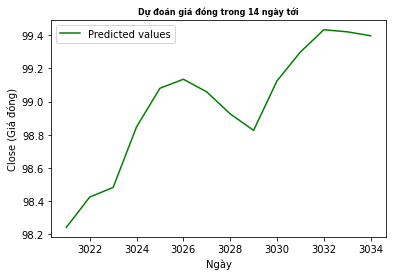

In [ ]:
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

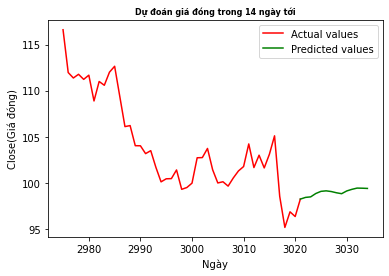

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_google_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close(Giá đóng)")
plt.legend()

#### 3.4 Đánh giá độ đo MAE và so sánh

In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Mean Absolute Error': [rnn_mae, mlp_mae, rf_mae]})
compare.sort_values(by='Mean Absolute Error', ascending=True)

,Model,Mean Absolute Error
1,MLP,0.013790
0,RNN,0.037820
2,Random Forest,0.216481


#### 3.5 Thời gian Training và Testing

In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Training time': [time_train_rnn, time_train_mlp,  time_train_rf]})
compare.sort_values(by='Training time', ascending=True)

,Model,Training time
1,MLP,0.0 giờ : 0.0 phút : 3.03 giây
2,Random Forest,0.0 giờ : 0.0 phút : 56.42 giây
0,RNN,0.0 giờ : 0.0 phút : 8.65 giây


In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Testing time': [time_test_rnn, time_test_mlp,  time_test_rf]})
compare.sort_values(by='Testing time', ascending=True)

,Model,Testing time
2,Random Forest,0.0 giờ : 0.0 phút : 0.02 giây
1,MLP,0.0 giờ : 0.0 phút : 0.18 giây
0,RNN,0.0 giờ : 0.0 phút : 0.43 giây


### **(4) XỬ LÝ OVERFITTING VÀ SO SÁNH**

In [ ]:
early_stopping = EarlyStopping(patience=2, min_delta=0.0001, monitor="val_loss", verbose=1)

#### 4.1 Mô hình RNN

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
regressor_rnn = Sequential()
regressor_rnn.add(SimpleRNN(units=100, activation='relu',
                        input_shape = (X_train.shape[1], X_train.shape[2])))
regressor_rnn.add(Dropout(0.2))
regressor_rnn.add(RepeatVector(6))
regressor_rnn.add(SimpleRNN(units=100, activation='relu', return_sequences = True))
regressor_rnn.add(Dropout(0.2))
regressor_rnn.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

# Bien dich RNN
regressor_rnn.compile(optimizer='adam', loss = 'mse', metrics=['mae'])#mean_squared_error
regressor_rnn.summary()

# huấn luyện mô hình RNN với early stopping
regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, callbacks=[early_stopping],verbose=1)
# callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]) validation_split=0.2 verbose=1

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 100)               10700     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 repeat_vector_5 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 dropout_7 (Dropout)         (None, 6, 100)            0         
                                                                 
 time_distributed_5 (TimeDis  (None, 6, 1)             101       
 tributed)                                            

17/17 [==============================] - 0s 6ms/step
(544, 6, 1)


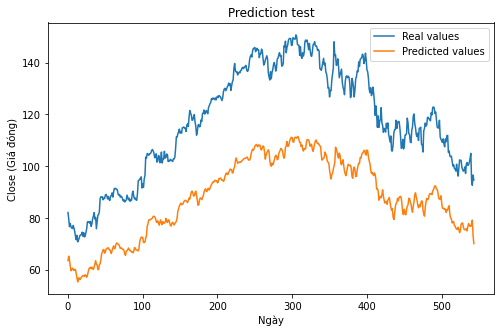

In [ ]:
#Test results
y_pred = regressor_rnn.predict(X_test)#verbose=1
print(y_pred.shape) #(544, 6, 1) -  reshaped thành (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rnn_ovf = sc.inverse_transform(y_test_inv)
y_pred_rnn_ovf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rnn_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

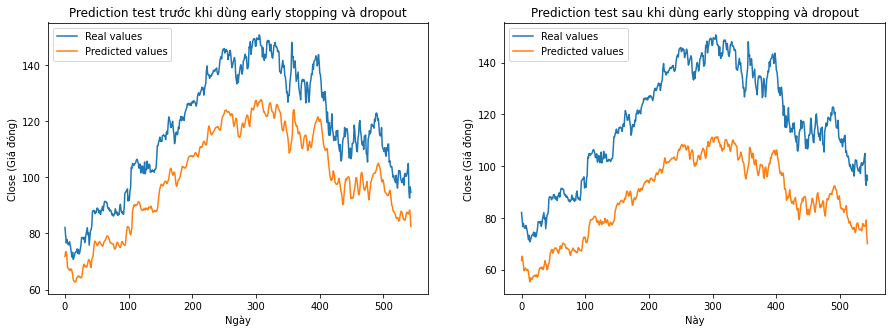

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_rnn[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test trước khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_rnn_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test sau khi dùng early stopping và dropout')
plt.xlabel('Này')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

#### 4.2 Mô hình MLP

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train2 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train2 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
regressor_mlp = Sequential()
regressor_mlp.add(Dense(units=100, activation = "relu", input_dim=n_input))
regressor_mlp.add(Dropout(0.2))
regressor_mlp.add(Dense(units=100, activation = "relu"))
regressor_mlp.add(Dropout(0.2))
regressor_mlp.add(Dense(n_output))
# Bien dich MLP
regressor_mlp.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
regressor_mlp.summary()
# huấn luyện mô hình
regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               36100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 6)                 606       
                                                                 
Total params: 46,806
Trainable params: 46,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] -

17/17 [==============================] - 0s 1ms/step
(544, 6)


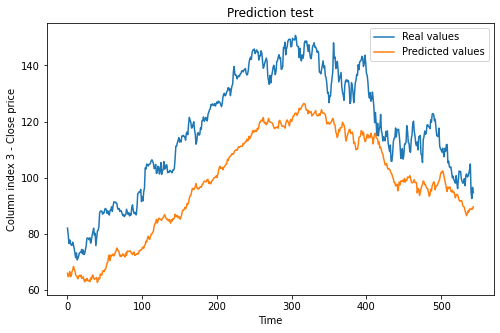

In [ ]:
# regressor.fit(X_train2, y_train, epochs = 5, batch_size = 32)
X_test2 = X_test.reshape((X_test.shape[0], n_input))

#Test results
y_pred = regressor_mlp.predict(X_test2)
print(y_pred.shape) #(544, 6)

#Reshape dữ liệu cho inverse transforming
y_test2 = y_test.reshape((y_test.shape[0], n_output)) #reshape (544, 6)
# y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_mlp_ovf = sc.inverse_transform(y_test2)
y_pred_mlp_ovf = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_mlp_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Time')
#plt.ylim([15, 28])
plt.ylabel('Column index 3 - Close price') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

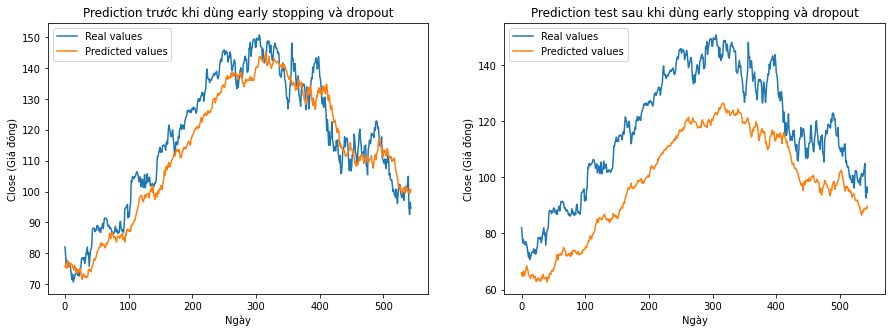

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_mlp[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction trước khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_mlp_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test sau khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

#### 4.3 Mô hình Random forest

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train3 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train3 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
# Tìm tham số tốt nhất để xử lý overfitting
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'bootstrap': bootstrap}
          
rfr = RandomForestRegressor(random_state = 1)

rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, 
                                scoring='neg_mean_absolute_error', cv = 3, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train3, y_train3)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print(rfr_random.best_params_)

{'n_estimators': 10, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# regressor_rf = RandomForestRegressor(n_estimators=50, random_state=42, 
#                                      min_samples_split=2, 
#                                      min_samples_leaf=1, max_depth=10, 
#                                      bootstrap=True)# có thể sử dụng nhiều tham số để loại bỏ phần thừa một cách dễ dàng
regressor_rf = RandomForestRegressor(n_estimators= 10, max_features= 'log2', 
                                     max_depth= None, bootstrap= True) 
regressor_rf.fit(X_train3, y_train3)

RandomForestRegressor(max_features='log2', n_estimators=10)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test3 = X_test.reshape((X_test.shape[0], n_input))
y_test3 = y_test.reshape((y_test.shape[0], n_output)) # (544, 1, 6) -> (544, 6)
#Test results
y_pred = regressor_rf.predict(X_test3)
print('Mean Absolute Error:', mean_absolute_error(y_test3, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test3, y_pred))

Mean Absolute Error: 0.21778770366779787
Mean Squared Error: 0.07013951270565381


In [ ]:
y_test.shape

(544, 1, 6)

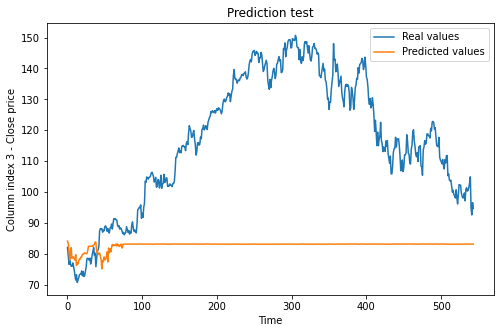

In [ ]:
#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rf_ovf = sc.inverse_transform(y_test3)
y_pred_rf_ovf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rf_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rf_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Time')
plt.ylabel('Column index 3 - Close price') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

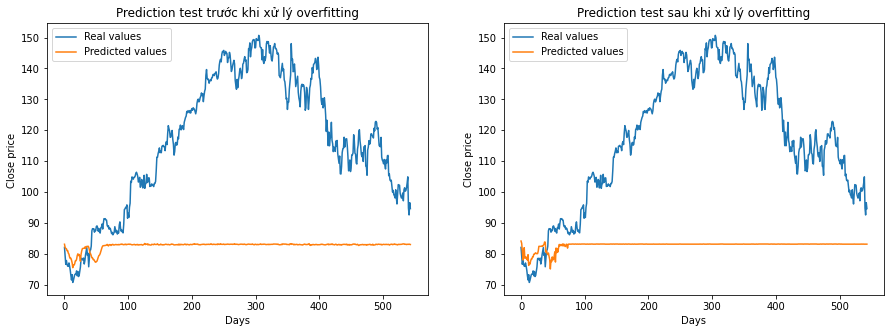

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_rf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_rf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test trước khi xử lý overfitting')
plt.xlabel('Days')
plt.ylabel('Close price ')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_rf_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_rf_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test sau khi xử lý overfitting')
plt.xlabel('Days')
plt.ylabel('Close price')
#plt.ylim([15, 28])
plt.legend()

###(5) TÌM ĐẶC TRƯNG QUAN TRỌNG NHẤT

In [ ]:
# Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
df_google = df_google
X = df_google.drop(['Close'], axis=1)
y = df_google['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
reg.feature_importances_

array([0.14088525, 0.23006376, 0.27511882, 0.32725985, 0.02667233])

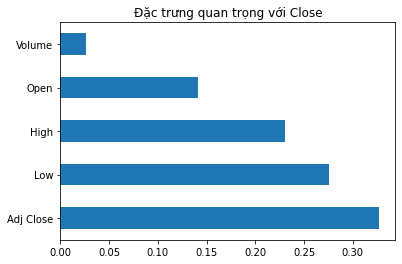

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh', title='Đặc trưng quan trọng với Close')
plt.show()

In [ ]:
feat_importances

Open         0.140885
High         0.230064
Low          0.275119
Adj Close    0.327260
Volume       0.026672
dtype: float64

In [ ]:
feat_importances[feat_importances == max(feat_importances)].index

Index(['Adj Close'], dtype='object')

### (6) MÔ HÌNH DEEP LEARNING

#### 6.1 Mô hình LSTM

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# LSTM
def lstm():
  regressor_lstm = Sequential()
  regressor_lstm.add(LSTM(units=100,input_shape = (X_train.shape[1], X_train.shape[2])))
  regressor_lstm.add(Dropout(0.2))
  regressor_lstm.add(RepeatVector(6))
  regressor_lstm.add(LSTM(units=100, return_sequences = True))
  regressor_lstm.add(Dropout(0.2))
  regressor_lstm.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

  # Bien dich LSTM
  regressor_lstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
  regressor_lstm.summary()
  return regressor_lstm

In [ ]:
# huấn luyện mô hình
regressor_lstm = lstm()
regressor_lstm.fit(X_train, y_train, epochs = 5, batch_size = 32,  shuffle = False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 repeat_vector_6 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 6, 100)            80400     
                                                                 
 dropout_11 (Dropout)        (None, 6, 100)            0         
                                                                 
 time_distributed_6 (TimeDis  (None, 6, 1)             101       
 tributed)                                           

17/17 [==============================] - 1s 18ms/step
(544, 6, 1)


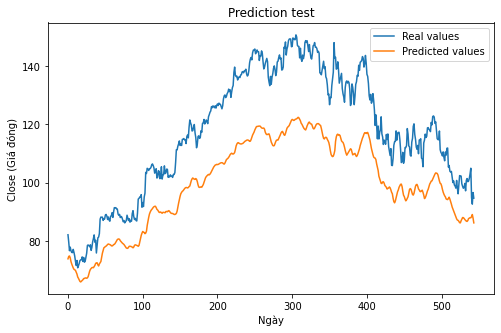

In [ ]:
#Test results
y_pred = regressor_lstm.predict(X_test)
print(y_pred.shape) #(544, 6, 1) - reshape thành (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_inv = sc.inverse_transform(y_test_inv)
y_pred_lstm = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_inv[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_lstm[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo và Vẽ đồ thị

In [ ]:
df_google_real_pred = data_google  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_google = df_google_real_pred.iloc[-time_step:]
  X_input = df_google.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột, reshape convert thành 3D array

  LSTM_prediction = regressor_lstm.predict(X_input)
  LSTM_prediction.shape
  LSTM_prediction = np.reshape(LSTM_prediction, (LSTM_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  LSTM_prediction = sc.inverse_transform(LSTM_prediction)
  print("LSTM,  Giá đóng cửa cho ngày " + str(day) +"/11/2022:", LSTM_prediction[0,1])

  # Đưa dữ liệu vào bộ train
  df_google_predicted = pd.DataFrame(LSTM_prediction, columns=df_google.columns)
  data = [df_google_real_pred, df_google_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_google_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_google_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_google_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_lstm.fit(X_train, y_train, epochs = 5, batch_size = 32)


1/1 [==============================] - 1s 826ms/step
LSTM,  Giá đóng cửa cho ngày 1/11/2022: 98.54897
Epoch 1/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0061 - mae: 0.0473
Epoch 2/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0060 - mae: 0.0473
Epoch 3/5
76/76 [==============================] - 4s 48ms/step - loss: 0.0060 - mae: 0.0473
Epoch 4/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0060 - mae: 0.0474
Epoch 5/5
1/1 [==============================] - 0s 27ms/step
LSTM,  Giá đóng cửa cho ngày 2/11/2022: 98.62393
Epoch 1/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0060 - mae: 0.0475
Epoch 2/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0060 - mae: 0.0473
Epoch 3/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0060 - mae: 0.0473
Epoch 4/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0060 - mae: 0.0474
Epoch 5/5
1/1 [============================

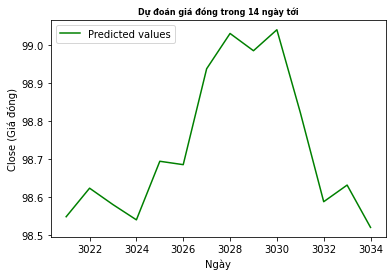

In [ ]:
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

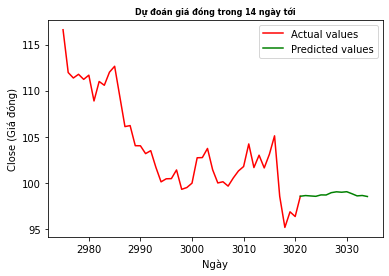

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_google_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### Mô hình BiLSTM 

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_google,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
def bilstm():
    regressor_bilstm = Sequential()
    # Input layer
    regressor_bilstm.add(Bidirectional(
              LSTM(units = 100), input_shape=(X_train.shape[1], X_train.shape[2])))
    regressor_bilstm.add(RepeatVector(6))
    # Hidden layer
    regressor_bilstm.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
    regressor_bilstm.add(TimeDistributed(Dense(1)))
    #Compile model
    regressor_bilstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
    regressor_bilstm.summary()

    return regressor_bilstm

In [ ]:
regressor_bilstm = bilstm()
start_time=timer(None)
regressor_bilstm.fit( X_train, y_train, epochs = 5, batch_size = 32)
timer(start_time)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 200)              85600     
 nal)                                                            
                                                                 
 repeat_vector_7 (RepeatVect  (None, 6, 200)           0         
 or)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 6, 200)           240800    
 nal)                                                            
                                                                 
 time_distributed_7 (TimeDis  (None, 6, 1)             201       
 tributed)                                                       
                                                                 
Total params: 326,601
Trainable params: 326,601
Non-t

'0.0 giờ : 0.0 phút : 40.98 giây'

17/17 [==============================] - 2s 26ms/step
(544, 6, 1)


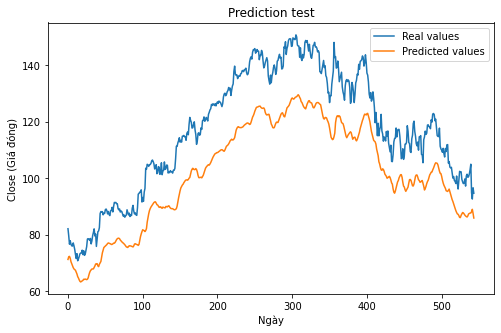

In [ ]:
#Test results
y_pred = regressor_bilstm.predict(X_test)
print(y_pred.shape) #(544, 6, 1) - reshape thành(544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_inv = sc.inverse_transform(y_test_inv)
y_pred_bilstm = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_inv[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_bilstm[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo và Vẽ đồ thị

In [ ]:
df_google_real_pred = data_google  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_google = df_google_real_pred.iloc[-time_step:]
  X_input = df_google.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột                    # reshaping : converting to 3D array

  biLSTM_prediction = regressor_bilstm.predict(X_input)
  biLSTM_prediction.shape
  biLSTM_prediction = np.reshape(biLSTM_prediction, (biLSTM_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  biLSTM_prediction = sc.inverse_transform(biLSTM_prediction)
  print("BiLSTM, Giá đóng cho ngày " + str(day) +"/11/2022:", biLSTM_prediction[0,1])

  # Đưa dữ liệu vào bộ train
  df_google_predicted = pd.DataFrame(biLSTM_prediction, columns=df_google.columns)
  data = [df_google_real_pred, df_google_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_google_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_google_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_google_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_bilstm.fit(X_train, y_train, epochs = 5, batch_size = 32)


1/1 [==============================] - 3s 3s/step
BiLSTM, Giá đóng cho ngày 1/11/2022: 99.400406
Epoch 1/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0059 - mae: 0.0471
Epoch 2/5
76/76 [==============================] - 7s 90ms/step - loss: 0.0059 - mae: 0.0472
Epoch 3/5
76/76 [==============================] - 7s 90ms/step - loss: 0.0059 - mae: 0.0471
Epoch 4/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0059 - mae: 0.0471
Epoch 5/5
1/1 [==============================] - 0s 26ms/step
BiLSTM, Giá đóng cho ngày 2/11/2022: 99.384865
Epoch 1/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0059 - mae: 0.0471
Epoch 2/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0059 - mae: 0.0470
Epoch 3/5
76/76 [==============================] - 7s 91ms/step - loss: 0.0059 - mae: 0.0470
Epoch 4/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0059 - mae: 0.0471
Epoch 5/5
1/1 [==============================] - 0

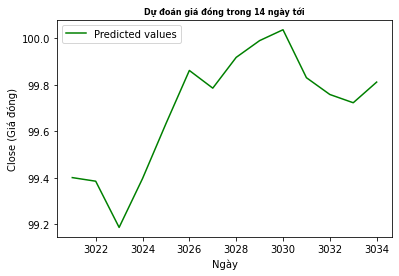

In [ ]:
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

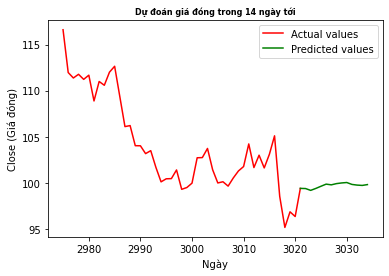

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_google_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_google_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

# **CỔ PHIẾU APPLE**

## Với bộ dữ liệu theo ngày

### **(2) PHÂN TÍCH BÀI TOÁN**

Với giá của phiếu chúng ta sẽ chọn giá điều chỉnh, giá đóng, giá mở,... để dự đoán cho tương lai

In [ ]:
data_apple = df_Apple

In [ ]:
data_apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-01,10.793571,10.914286,10.792857,10.863571,9.260303,423889200
2010-11-02,10.964286,11.078214,10.964286,11.048571,9.417997,433930000
2010-11-03,11.120357,11.174286,11.018929,11.171429,9.522726,508348400
2010-11-04,11.266071,11.435000,11.251071,11.366786,9.689249,642488000
2010-11-05,11.356786,11.413214,11.312500,11.326071,9.654545,361253200


In [ ]:
def split_sequences(data_stock, training_set_scaled, time_step, split_percent):
  split = int(split_percent*len(training_set_scaled)) #split percent multiplying by data rows

  X = []
  y = []
  for i in range(time_step + 1, len(training_set_scaled)):
    X.append(training_set_scaled[i-time_step-1:i-1, 0:len(data_stock.columns)]) #dung 60 ngay de du doan ngay 61
    y.append(training_set_scaled[i,0:len(data_stock.columns)]) #lấy tất cả các cột vào set và trừ đi 2 cột

  X_arr, y_arr = np.array(X), np.array(y)

  #Split data
  X_train = X_arr[:split] #(80%) model train input data
  y_train = y_arr[:split] #80%) model train target data
  X_test = X_arr[split:] #(20%) test prediction input data
  y_test = y_arr[split:] #(20%) test prediction compare data

  #Reshaping lại rows/time_step/columns
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2])) #(samples, time-steps, features)
  y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1])) #(samples, time-steps, features)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2])) #(samples, time-steps, features)
  y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1])) #(samples, time-steps, features)

  return X_train, y_train, X_test, y_test

In [ ]:
future_prediction = 14
time_step = 60 #learning step: để giảm lỗi số của kết quả tính toán, giúp chia tập X,y
split_percent = 0.80 #train/test data split (80%)

In [ ]:
training_set = data_apple.values

# Normalize dữ liệu
sc = MinMaxScaler(feature_range = [0,1])
training_set_scaled = sc.fit_transform(training_set)

### **(3) XÂY DỰNG CÁC MÔ HÌNH**

In [ ]:
# Hàm tính thời gian train và test
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        return str(thour) + " giờ : "+ str(tmin) +' phút : ' + str(round(tsec,2)) + ' giây' #hour:min:sec

#### 3.1 Mô hình RNN

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# RNN
def rnn():
  regressor_rnn = Sequential()
  regressor_rnn.add(SimpleRNN(units=100, activation='relu',
                        input_shape = (X_train.shape[1], X_train.shape[2])))
  regressor_rnn.add(RepeatVector(6))
  regressor_rnn.add(SimpleRNN(units=100, activation='relu', return_sequences = True))
  regressor_rnn.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

  # Bien dich RNN
  regressor_rnn.compile(optimizer='adam', loss = 'mse', metrics=['mae'])#mean_squared_error
  regressor_rnn.summary()
  return regressor_rnn

In [ ]:
# huấn luyện mô hình
regressor_rnn = rnn()
start_time=timer(None)
history = regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, verbose=1)
mae = history.history['mae']
rnn_mae = round(float(mae[-1]), 5)
time_train_rnn = timer(start_time)
print('Training time -', timer(start_time))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 100)               10700     
                                                                 
 repeat_vector_8 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 time_distributed_8 (TimeDis  (None, 6, 1)             101       
 tributed)                                                       
                                                                 
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] 

17/17 [==============================] - 0s 8ms/step
Testing time - 0.0 giờ : 0.0 phút : 0.44 giây
(544, 6, 1)


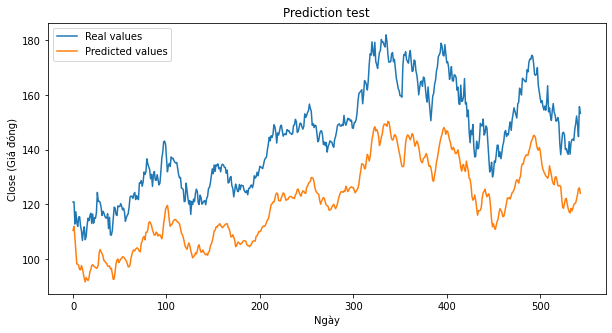

In [ ]:
#Test results
start_time=timer(None)
y_pred = regressor_rnn.predict(X_test)#verbose=1
print('Testing time -', timer(start_time))
time_test_rnn = timer(start_time)
print(y_pred.shape) #(544, 6, 1) reshaped về (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape (544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rnn = sc.inverse_transform(y_test_inv)
y_pred_rnn = sc.inverse_transform(y_pred)

plt.figure(figsize=(10,5))
plt.plot(y_test_rnn[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng RNN và Vẽ đồ thị

In [ ]:
df_apple_real_pred = data_apple # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_apple = df_apple_real_pred.iloc[-time_step:]
  X_input = df_apple.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột, reshape convert thành 3D array

  simple_RNN_prediction = regressor_rnn.predict(X_input) # dự đoán cho ngày thứ 61
  simple_RNN_prediction.shape
  simple_RNN_prediction = np.reshape(simple_RNN_prediction, (simple_RNN_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  simple_RNN_prediction = sc.inverse_transform(simple_RNN_prediction)
  print("Simple RNN, Giá đóng cửa cho ngày " + str(day) +"/11/2022:", simple_RNN_prediction[0,1])
  a= simple_RNN_prediction[0,1]
  # Đưa dữ liệu vào bộ train
  df_apple_predicted = pd.DataFrame(simple_RNN_prediction, columns=df_apple.columns)
  data = [df_apple_real_pred, df_apple_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_apple_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_apple_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_apple_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, verbose=1)


1/1 [==============================] - 0s 269ms/step
Simple RNN, Giá đóng cửa cho ngày 1/11/2022: 153.92615
Epoch 1/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0038 - mae: 0.0351 - val_loss: 0.0107 - val_mae: 0.0632
Epoch 2/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0039 - mae: 0.0353 - val_loss: 0.0107 - val_mae: 0.0683
Epoch 3/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0039 - mae: 0.0352 - val_loss: 0.0107 - val_mae: 0.0677
Epoch 4/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0038 - mae: 0.0349 - val_loss: 0.0107 - val_mae: 0.0745
Epoch 5/5
1/1 [==============================] - 0s 20ms/step
Simple RNN, Giá đóng cửa cho ngày 2/11/2022: 152.38307
Epoch 1/5
61/61 [==============================] - 1s 21ms/step - loss: 0.0038 - mae: 0.0351 - val_loss: 0.0107 - val_mae: 0.0696
Epoch 2/5
61/61 [==============================] - 1s 20ms/step - loss: 0.0038 - mae: 0.0352 - val_loss: 0.0107 - val_mae: 0.

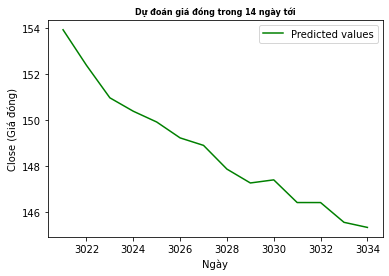

In [ ]:
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

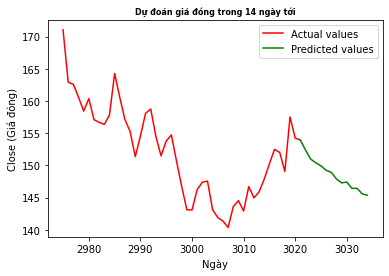

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_apple_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### **3.2 Mô hình MLP**

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train2 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train2 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
def mlp():
  regressor_mlp = Sequential()
  regressor_mlp.add(Dense(units=100, activation = "relu", input_dim=n_input))
  regressor_mlp.add(Dense(units=100, activation = "relu"))
  regressor_mlp.add(Dense(n_output))
  # Bien dich MLP
  regressor_mlp.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
  regressor_mlp.summary()
  return regressor_mlp

In [ ]:
# huấn luyện mô hình
regressor_mlp = mlp()
start_time=timer(None)
history = regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, verbose = 1)
mae = history.history['mae']
mlp_mae = round(float(mae[-1]), 5)
print('Training time -', timer(start_time))
time_train_mlp = timer(start_time)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               36100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 6)                 606       
                                                                 
Total params: 46,806
Trainable params: 46,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] - 1s 5ms/step - loss: 0.0016 - mae: 0.0238 - val_loss: 0.0017 - val_mae: 0.0299
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 0.0010 - mae: 0.0170 - val_loss: 0.0021 - val_mae: 0.0322
Epoch 3/5
61/61 [==============================] - 0s 4

17/17 [==============================] - 0s 2ms/step
Testing time - 0.0 giờ : 0.0 phút : 0.12 giây
(544, 6)


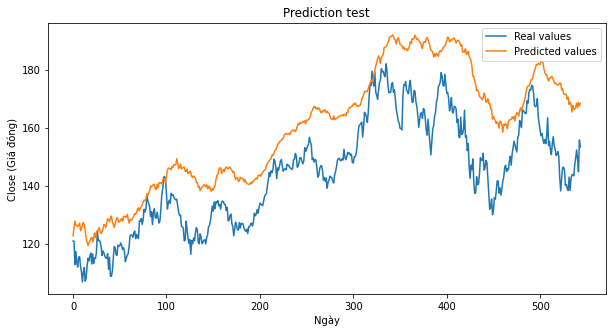

In [ ]:
X_test2 = X_test.reshape((X_test.shape[0], n_input))

#Test results
start_time=timer(None)
y_pred = regressor_mlp.predict(X_test2)
time_test_mlp = timer(start_time)
print('Testing time -', timer(start_time))
print(y_pred.shape) #(544, 6)

#Reshape dữ liệu cho inverse transforming
y_test2 = y_test.reshape((y_test.shape[0], n_output)) #reshape (544, 6)
# y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape (544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_mlp = sc.inverse_transform(y_test2)
y_pred_mlp = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_mlp[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng MLP và Vẽ đồ thị

In [ ]:
df_apple_real_pred = data_apple  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán
day = 0
for i in range(future_prediction):
  day += 1
  df_apple = df_apple_real_pred.iloc[-time_step:]
  X_input = df_apple.values
  X_input = sc.fit_transform(X_input) # convert thành 2D array and scale
  X_input = X_input.reshape(1, n_input) # 1 phần tử chứa 540 

  mlp_prediction = regressor_mlp.predict(X_input)
  mlp_prediction = np.reshape(mlp_prediction, (mlp_prediction.shape[0], 6)) #reshaping for (1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  mlp_prediction = sc.inverse_transform(mlp_prediction)
  print("MLP, Giá đóng cửa cho ngày " + str(day) +"/11/2022:", mlp_prediction[0,1])
  
  # Đưa dữ liệu vào bộ train
  df_apple_predicted = pd.DataFrame(mlp_prediction, columns=df_apple.columns)
  data = [df_apple_real_pred, df_apple_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_apple_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_apple_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_apple_real_pred,training_set_scaled,
                                                  time_step, split_percent)

  # flatten input
  n_input = X_train.shape[1] * X_train.shape[2]
  X_train2 = X_train.reshape((X_train.shape[0], n_input))
  n_output = y_train.shape[2]
  y_train2 = y_train.reshape((y_train.shape[0], n_output))

  # huấn luyện lại mô hình
  regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, verbose= 1)


1/1 [==============================] - 0s 52ms/step
MLP, Giá đóng cửa cho ngày 1/11/2022: 151.90097
Epoch 1/5
61/61 [==============================] - 0s 4ms/step - loss: 8.6427e-04 - mae: 0.0142 - val_loss: 8.7694e-04 - val_mae: 0.0224
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 8.5257e-04 - mae: 0.0140 - val_loss: 0.0016 - val_mae: 0.0294
Epoch 3/5
61/61 [==============================] - 0s 4ms/step - loss: 8.1896e-04 - mae: 0.0134 - val_loss: 9.7118e-04 - val_mae: 0.0235
Epoch 4/5
61/61 [==============================] - 0s 3ms/step - loss: 8.1061e-04 - mae: 0.0130 - val_loss: 9.5876e-04 - val_mae: 0.0225
Epoch 5/5
1/1 [==============================] - 0s 17ms/step
MLP, Giá đóng cửa cho ngày 2/11/2022: 150.69524
Epoch 1/5
61/61 [==============================] - 0s 4ms/step - loss: 7.9996e-04 - mae: 0.0130 - val_loss: 7.1869e-04 - val_mae: 0.0191
Epoch 2/5
61/61 [==============================] - 0s 3ms/step - loss: 7.8544e-04 - mae: 0.0131 - val_loss: 0

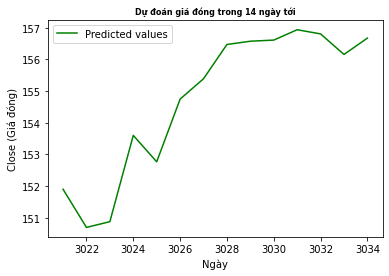

In [ ]:
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

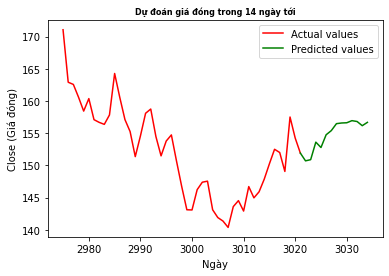

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_apple_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### **3.3 Mô hình Random Forest**

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)
# (2416, 60, 6), (2416, 1, 6), (544, 60, 6), (544, 1, 6)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2] 
X_train3 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train3 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor() # không parameter để test overfitting
start_time=timer(None)
regressor_rf.fit(X_train3, y_train3)
time_train_rf = timer(start_time)
print('Training time -', timer(start_time))

Training time - 0.0 giờ : 0.0 phút : 52.9 giây


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test3 = X_test.reshape((X_test.shape[0], n_input))
y_test3 = y_test.reshape((y_test.shape[0], n_output))
#Test results
start_time=timer(None)
y_pred = regressor_rf.predict(X_test3)

time_test_rf = timer(start_time)
rf_mae = mean_absolute_error(y_test3, y_pred)
print('Testing time -', timer(start_time))
print('Mean Absolute Error:', mean_absolute_error(y_test3, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test3, y_pred))

Testing time - 0.0 giờ : 0.0 phút : 0.01 giây
Mean Absolute Error: 0.09856726537130504
Mean Squared Error: 0.015120614378236587


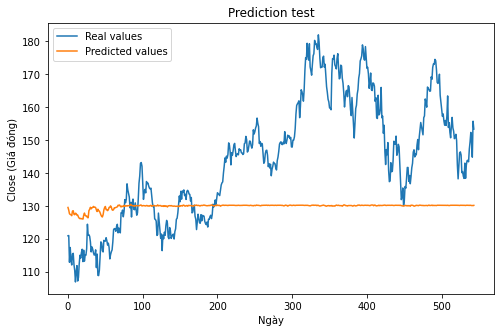

In [ ]:
#Reversing transform để có được giá trị dữ liệu thích hợp
y_test_rf = sc.inverse_transform(y_test3)
y_pred_rf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3  là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo bằng Random Forest và Vẽ đồ thị

In [ ]:
df_apple_real_pred = data_apple  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
df_apple_real_pred.shape

(3021, 6)

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_apple_pred = df_apple_real_pred.iloc[-time_step:]
  X_input = df_apple_pred.values
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = X_input.reshape(1, n_input) # 1 phần tử chứa 540 
  print(X_input.shape)
  rf_prediction = regressor_rf.predict(X_input)
  # y_pred = regressor_rf.predict(X_test3)
  rf_prediction = np.reshape(rf_prediction, (rf_prediction.shape[0], 6)) #reshaping for (1, 6)
  #Reversing transform to get proper data values
  rf_prediction = sc.inverse_transform(rf_prediction)
  print("Random Forest, Giá đóng cho ngày " + str(day) +"/11/2022:", rf_prediction[0,1])
  
  # Đưa dữ liệu vào bộ train
  df_apple_predicted = pd.DataFrame(rf_prediction, columns=df_apple.columns)
  data = [df_apple_real_pred, df_apple_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_apple_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_apple_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_apple_real_pred,training_set_scaled,
                                                  time_step, split_percent)

  # flatten input
  n_input = X_train.shape[1] * X_train.shape[2]
  X_train3 = X_train.reshape((X_train.shape[0], n_input))
  n_output = y_train.shape[2]
  y_train3 = y_train.reshape((y_train.shape[0], n_output))

  # huấn luyện lại mô hình
  regressor_rf.fit(X_train3, y_train3)


(1, 360)
Random Forest, Giá đóng cho ngày 1/11/2022: 156.08916025560197
(1, 360)
Random Forest, Giá đóng cho ngày 2/11/2022: 157.53486008955227
(1, 360)
Random Forest, Giá đóng cho ngày 3/11/2022: 157.87206447474588
(1, 360)
Random Forest, Giá đóng cho ngày 4/11/2022: 158.25098976539496
(1, 360)
Random Forest, Giá đóng cho ngày 5/11/2022: 157.83056197401535
(1, 360)
Random Forest, Giá đóng cho ngày 6/11/2022: 158.25116140565254
(1, 360)
Random Forest, Giá đóng cho ngày 7/11/2022: 158.82905153509185
(1, 360)
Random Forest, Giá đóng cho ngày 8/11/2022: 158.96505535311456
(1, 360)
Random Forest, Giá đóng cho ngày 9/11/2022: 158.2641534222232
(1, 360)
Random Forest, Giá đóng cho ngày 10/11/2022: 158.69765043494402
(1, 360)
Random Forest, Giá đóng cho ngày 11/11/2022: 157.0008279698811
(1, 360)
Random Forest, Giá đóng cho ngày 12/11/2022: 156.7288891084991
(1, 360)
Random Forest, Giá đóng cho ngày 13/11/2022: 156.7830700192609
(1, 360)
Random Forest, Giá đóng cho ngày 14/11/2022: 156.844072

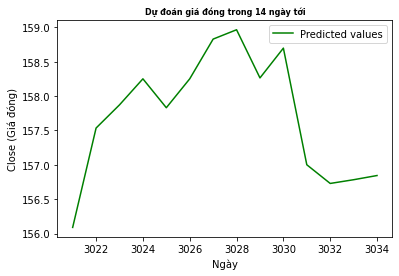

In [ ]:
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

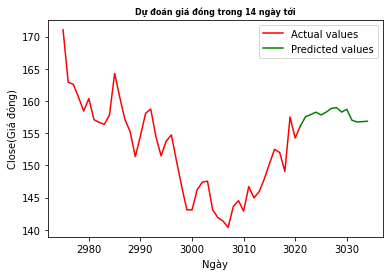

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_apple_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close(Giá đóng)")
plt.legend()

#### 3.4 Đánh giá độ đo MAE và so sánh

In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Mean Absolute Error': [rnn_mae, mlp_mae, rf_mae]})
compare.sort_values(by='Mean Absolute Error', ascending=True)

,Model,Mean Absolute Error
1,MLP,0.014830
0,RNN,0.035020
2,Random Forest,0.098567


#### 3.5 Thời gian Training và Testing

In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Training time': [time_train_rnn, time_train_mlp,  time_train_rf]})
compare.sort_values(by='Training time', ascending=True)

,Model,Training time
1,MLP,0.0 giờ : 0.0 phút : 1.77 giây
0,RNN,0.0 giờ : 0.0 phút : 11.89 giây
2,Random Forest,0.0 giờ : 0.0 phút : 52.9 giây


In [ ]:
compare = pd.DataFrame({'Model': ['RNN', 'MLP', 'Random Forest'], 
                        'Testing time': [time_test_rnn, time_test_mlp,  time_test_rf]})
compare.sort_values(by='Testing time', ascending=True)

,Model,Testing time
2,Random Forest,0.0 giờ : 0.0 phút : 0.01 giây
1,MLP,0.0 giờ : 0.0 phút : 0.12 giây
0,RNN,0.0 giờ : 0.0 phút : 0.44 giây


### **(4) XỬ LÝ OVERFITTING VÀ SO SÁNH**

In [ ]:
early_stopping = EarlyStopping(patience=2, min_delta=0.0001, monitor="val_loss", verbose=1)

#### 4.1 Mô hình RNN

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
regressor_rnn = Sequential()
regressor_rnn.add(SimpleRNN(units=100, activation='relu',
                        input_shape = (X_train.shape[1], X_train.shape[2])))
regressor_rnn.add(Dropout(0.2))
regressor_rnn.add(RepeatVector(6))
regressor_rnn.add(SimpleRNN(units=100, activation='relu', return_sequences = True))
regressor_rnn.add(Dropout(0.2))
regressor_rnn.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

# Bien dich RNN
regressor_rnn.compile(optimizer='adam', loss = 'mse', metrics=['mae'])#mean_squared_error
regressor_rnn.summary()

# huấn luyện mô hình RNN với early stopping
regressor_rnn.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split=0.2, callbacks=[early_stopping],verbose=1)
# callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]) validation_split=0.2 verbose=1

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 100)               10700     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 repeat_vector_9 (RepeatVect  (None, 6, 100)           0         
 or)                                                             
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 6, 100)            20100     
                                                                 
 dropout_13 (Dropout)        (None, 6, 100)            0         
                                                                 
 time_distributed_9 (TimeDis  (None, 6, 1)             101       
 tributed)                                           

17/17 [==============================] - 0s 6ms/step
(544, 6, 1)


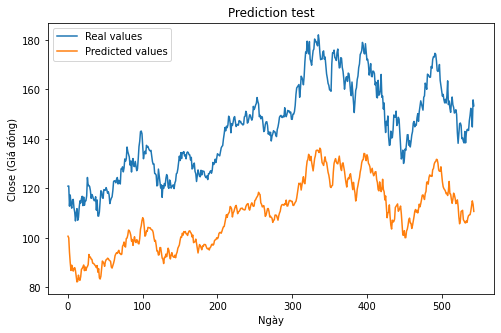

In [ ]:
#Test results
y_pred = regressor_rnn.predict(X_test)#verbose=1
print(y_pred.shape) #(544, 6, 1) -  reshaped thành (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rnn_ovf = sc.inverse_transform(y_test_inv)
y_pred_rnn_ovf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rnn_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

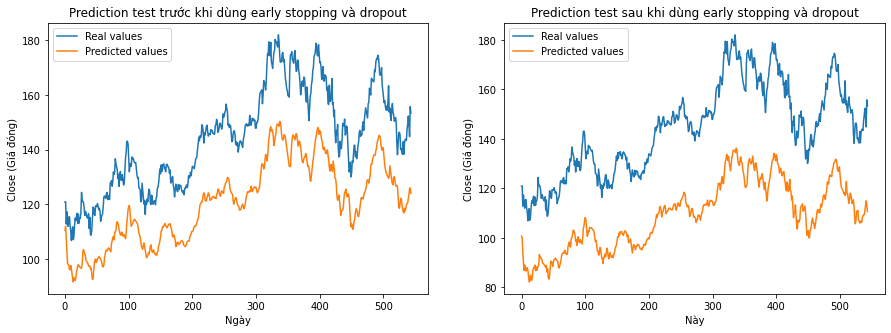

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_rnn[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test trước khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_rnn_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rnn_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test sau khi dùng early stopping và dropout')
plt.xlabel('Này')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

#### 4.2 Mô hình MLP

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train2 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train2 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
regressor_mlp = Sequential()
regressor_mlp.add(Dense(units=100, activation = "relu", input_dim=n_input))
regressor_mlp.add(Dropout(0.2))
regressor_mlp.add(Dense(units=100, activation = "relu"))
regressor_mlp.add(Dropout(0.2))
regressor_mlp.add(Dense(n_output))
# Bien dich MLP
regressor_mlp.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
regressor_mlp.summary()
# huấn luyện mô hình
regressor_mlp.fit(X_train2, y_train2, epochs = 5, batch_size = 32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               36100     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 6)                 606       
                                                                 
Total params: 46,806
Trainable params: 46,806
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
61/61 [==============================] 

17/17 [==============================] - 0s 2ms/step
(544, 6)


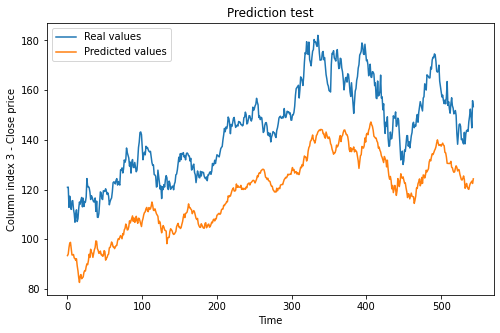

In [ ]:
# regressor.fit(X_train2, y_train, epochs = 5, batch_size = 32)
X_test2 = X_test.reshape((X_test.shape[0], n_input))

#Test results
y_pred = regressor_mlp.predict(X_test2)
print(y_pred.shape) #(544, 6)

#Reshape dữ liệu cho inverse transforming
y_test2 = y_test.reshape((y_test.shape[0], n_output)) #reshape (544, 6)
# y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_mlp_ovf = sc.inverse_transform(y_test2)
y_pred_mlp_ovf = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_mlp_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Time')
#plt.ylim([15, 28])
plt.ylabel('Column index 3 - Close price') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

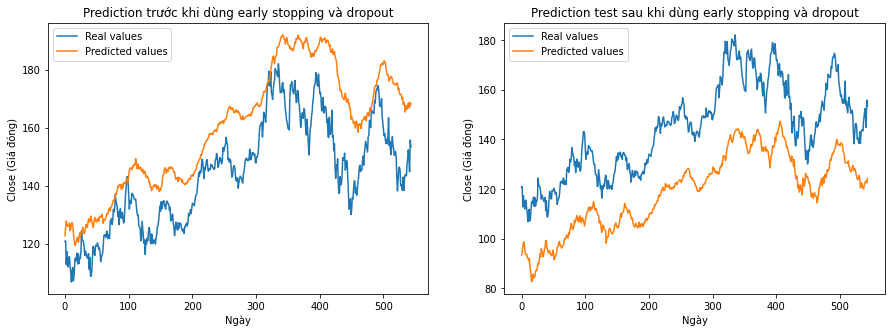

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_mlp[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction trước khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_mlp_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_mlp_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test sau khi dùng early stopping và dropout')
plt.xlabel('Ngày')
plt.ylabel('Close (Giá đóng)')
#plt.ylim([15, 28])
plt.legend()

#### 4.3 Mô hình Random forest

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train3 = X_train.reshape((X_train.shape[0], n_input))
n_output = y_train.shape[2]
y_train3 = y_train.reshape((y_train.shape[0], n_output))

In [ ]:
# Tìm tham số tốt nhất để xử lý overfitting
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'bootstrap': bootstrap}
          
rfr = RandomForestRegressor(random_state = 1)

rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, 
                                scoring='neg_mean_absolute_error', cv = 3, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train3, y_train3)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print(rfr_random.best_params_)

{'n_estimators': 5, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# regressor_rf = RandomForestRegressor(n_estimators=50, random_state=42, 
#                                      min_samples_split=2, 
#                                      min_samples_leaf=1, max_depth=10, 
#                                      bootstrap=True)# có thể sử dụng nhiều tham số để loại bỏ phần thừa một cách dễ dàng
regressor_rf = RandomForestRegressor(n_estimators= 5, max_features= 'auto', 
                                     max_depth= None, bootstrap= True) 
regressor_rf.fit(X_train3, y_train3)

RandomForestRegressor(n_estimators=5)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_test3 = X_test.reshape((X_test.shape[0], n_input))
y_test3 = y_test.reshape((y_test.shape[0], n_output)) # (544, 1, 6) -> (544, 6)
#Test results
y_pred = regressor_rf.predict(X_test3)
print('Mean Absolute Error:', mean_absolute_error(y_test3, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test3, y_pred))

Mean Absolute Error: 0.09568309370805533
Mean Squared Error: 0.015027574707430184


In [ ]:
y_test.shape

(544, 1, 6)

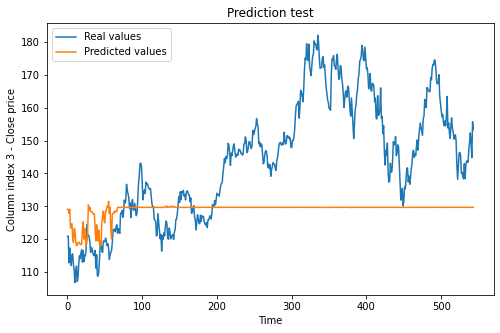

In [ ]:
#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_rf_ovf = sc.inverse_transform(y_test3)
y_pred_rf_ovf = sc.inverse_transform(y_pred)

plt.figure(figsize=(8,5))
plt.plot(y_test_rf_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_rf_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Time')
plt.ylabel('Column index 3 - Close price') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

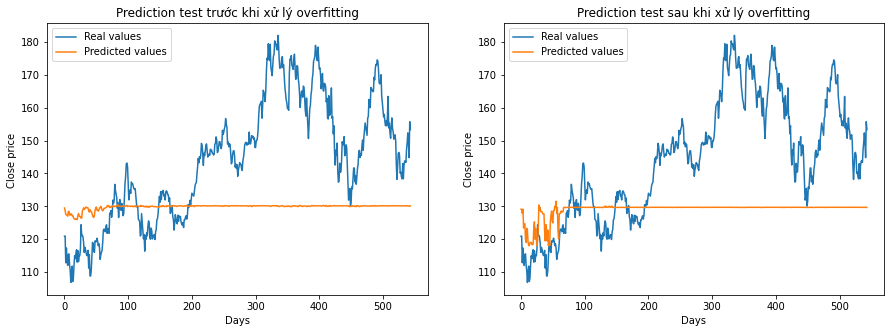

In [ ]:
# so sánh trước và sau khi xử lý overfiting
plt.figure(figsize=(15, 5));
plt.subplot(1, 2, 1)
plt.plot(y_test_rf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_rf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test trước khi xử lý overfitting')
plt.xlabel('Days')
plt.ylabel('Close price ')
#plt.ylim([15, 28])
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(y_test_rf_ovf[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_rf_ovf[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test sau khi xử lý overfitting')
plt.xlabel('Days')
plt.ylabel('Close price')
#plt.ylim([15, 28])
plt.legend()

###(5) TÌM ĐẶC TRƯNG QUAN TRỌNG NHẤT

In [ ]:
# Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
df_apple = df_apple
X = df_apple.drop(['Close'], axis=1)
y = df_apple['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
reg.feature_importances_

array([0.17807498, 0.29641385, 0.19531778, 0.31779339, 0.01240001])

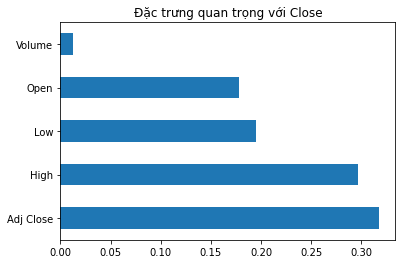

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh', title='Đặc trưng quan trọng với Close')
plt.show()

In [ ]:
feat_importances

Open         0.178075
High         0.296414
Low          0.195318
Adj Close    0.317793
Volume       0.012400
dtype: float64

In [ ]:
feat_importances[feat_importances == max(feat_importances)].index

Index(['Adj Close'], dtype='object')

### (6) MÔ HÌNH DEEP LEARNING

#### 6.1 Mô hình LSTM

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
# LSTM
def lstm():
  regressor_lstm = Sequential()
  regressor_lstm.add(LSTM(units=100,input_shape = (X_train.shape[1], X_train.shape[2])))
  regressor_lstm.add(Dropout(0.2))
  regressor_lstm.add(RepeatVector(6))
  regressor_lstm.add(LSTM(units=100, return_sequences = True))
  regressor_lstm.add(Dropout(0.2))
  regressor_lstm.add(TimeDistributed(Dense(1))) # `TimeDistributed` Layer phải được chuyển qua `input_shape ` với ít nhât 3 dimen

  # Bien dich LSTM
  regressor_lstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
  regressor_lstm.summary()
  return regressor_lstm

In [ ]:
# huấn luyện mô hình
regressor_lstm = lstm()
regressor_lstm.fit(X_train, y_train, epochs = 5, batch_size = 32,  shuffle = False)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               42800     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 repeat_vector_10 (RepeatVec  (None, 6, 100)           0         
 tor)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 6, 100)            80400     
                                                                 
 dropout_17 (Dropout)        (None, 6, 100)            0         
                                                                 
 time_distributed_10 (TimeDi  (None, 6, 1)             101       
 stributed)                                          

17/17 [==============================] - 1s 19ms/step
(544, 6, 1)


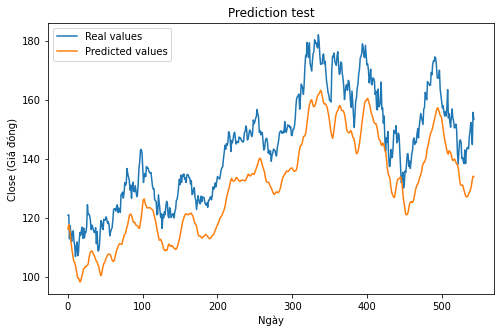

In [ ]:
#Test results
y_pred = regressor_lstm.predict(X_test)
print(y_pred.shape) #(544, 6, 1) - reshape thành (544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_inv = sc.inverse_transform(y_test_inv)
y_pred_lstm = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_inv[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.plot(y_pred_lstm[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3 là giá đóng
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo và Vẽ đồ thị

In [ ]:
df_apple_real_pred = data_apple  # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_apple = df_apple_real_pred.iloc[-time_step:]
  X_input = df_apple.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột, reshape convert thành 3D array

  LSTM_prediction = regressor_lstm.predict(X_input)
  LSTM_prediction.shape
  LSTM_prediction = np.reshape(LSTM_prediction, (LSTM_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  LSTM_prediction = sc.inverse_transform(LSTM_prediction)
  print("LSTM,  Giá đóng cửa cho ngày " + str(day) +"/11/2022:", LSTM_prediction[0,1])

  # Đưa dữ liệu vào bộ train
  df_apple_predicted = pd.DataFrame(LSTM_prediction, columns=df_apple.columns)
  data = [df_apple_real_pred, df_apple_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_apple_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_apple_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_apple_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_lstm.fit(X_train, y_train, epochs = 5, batch_size = 32)


1/1 [==============================] - 1s 822ms/step
LSTM,  Giá đóng cửa cho ngày 1/11/2022: 152.2809
Epoch 1/5
76/76 [==============================] - 4s 50ms/step - loss: 0.0054 - mae: 0.0415
Epoch 2/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0053 - mae: 0.0425
Epoch 3/5
76/76 [==============================] - 4s 50ms/step - loss: 0.0053 - mae: 0.0424
Epoch 4/5
76/76 [==============================] - 4s 51ms/step - loss: 0.0053 - mae: 0.0422
Epoch 5/5
1/1 [==============================] - 0s 26ms/step
LSTM,  Giá đóng cửa cho ngày 2/11/2022: 153.27495
Epoch 1/5
76/76 [==============================] - 4s 50ms/step - loss: 0.0053 - mae: 0.0423
Epoch 2/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0053 - mae: 0.0423
Epoch 3/5
76/76 [==============================] - 4s 50ms/step - loss: 0.0053 - mae: 0.0421
Epoch 4/5
76/76 [==============================] - 4s 49ms/step - loss: 0.0053 - mae: 0.0423
Epoch 5/5
1/1 [===========================

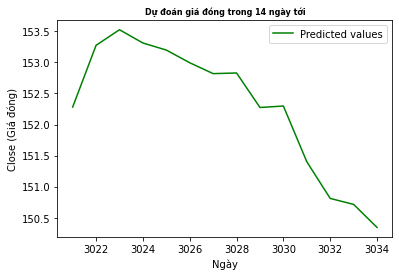

In [ ]:
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

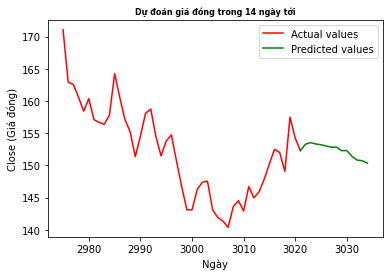

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_apple_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

#### Mô hình BiLSTM 

In [ ]:
X_train, y_train, X_test, y_test = split_sequences(data_apple,training_set_scaled,
                                                  time_step, split_percent)

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
def bilstm():
    regressor_bilstm = Sequential()
    # Input layer
    regressor_bilstm.add(Bidirectional(
              LSTM(units = 100), input_shape=(X_train.shape[1], X_train.shape[2])))
    regressor_bilstm.add(RepeatVector(6))
    # Hidden layer
    regressor_bilstm.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
    regressor_bilstm.add(TimeDistributed(Dense(1)))
    #Compile model
    regressor_bilstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])
    regressor_bilstm.summary()

    return regressor_bilstm

In [ ]:
regressor_bilstm = bilstm()
start_time=timer(None)
regressor_bilstm.fit( X_train, y_train, epochs = 5, batch_size = 32)
timer(start_time)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 200)              85600     
 nal)                                                            
                                                                 
 repeat_vector_11 (RepeatVec  (None, 6, 200)           0         
 tor)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 6, 200)           240800    
 nal)                                                            
                                                                 
 time_distributed_11 (TimeDi  (None, 6, 1)             201       
 stributed)                                                      
                                                                 
Total params: 326,601
Trainable params: 326,601
Non-t

'0.0 giờ : 0.0 phút : 47.41 giây'

17/17 [==============================] - 2s 26ms/step
(544, 6, 1)


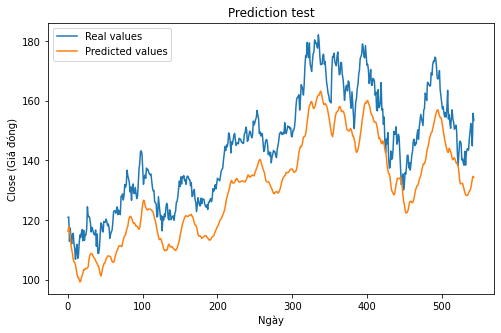

In [ ]:
#Test results
y_pred = regressor_bilstm.predict(X_test)
print(y_pred.shape) #(544, 6, 1) - reshape thành(544, 1, 6)

#Reshape dữ liệu cho inverse transforming
y_test_inv = np.reshape(y_test, (y_test.shape[0], 6)) #reshape (544, 1, 6)
y_pred = np.reshape(y_pred, (y_pred.shape[0], 6)) #reshape(544, 1, 6)

#Inverse transform để có được giá trị dữ liệu phù hợp
y_test_inv = sc.inverse_transform(y_test_inv)
y_pred_bilstm = sc.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_inv[:, 3], label = 'Real values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.plot(y_pred_bilstm[:, 3], label = 'Predicted values') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 3
plt.title('Prediction test')
plt.xlabel('Ngày')
#plt.ylim([15, 28])
plt.ylabel('Close (Giá đóng)') #Hiển thị giá trị của cột 3 cho dự đoán 
plt.legend()
plt.show()

##### Dự đoán 14 ngày tiếp theo và Vẽ đồ thị

In [ ]:
df_apple_real_pred = data_apple # tạo 1 bộ bao gồm cả dữ liệu thật và cho việc chứa kq dự đoán

In [ ]:
day = 0
for i in range(future_prediction):
  day += 1
  df_apple = df_apple_real_pred.iloc[-time_step:]
  X_input = df_apple.values # lấy 60 hàng cuối cùng và chuyển thành array
  X_input = sc.fit_transform(X_input) # convert thành 2D array và scale
  X_input = np.reshape(X_input, (1,X_input.shape[0],X_input.shape[1])) # chỉ 1 phần tử chứa 60 phần tử con có 6 cột                    # reshaping : converting to 3D array

  biLSTM_prediction = regressor_bilstm.predict(X_input)
  biLSTM_prediction.shape
  biLSTM_prediction = np.reshape(biLSTM_prediction, (biLSTM_prediction.shape[0], 6)) #reshaping for (1, 1, 6)
  #inverse transform để có được giá trị dữ liệu phù hợp
  biLSTM_prediction = sc.inverse_transform(biLSTM_prediction)
  print("BiLSTM, Giá đóng cho ngày " + str(day) +"/11/2022:", biLSTM_prediction[0,1])

  # Đưa dữ liệu vào bộ train
  df_apple_predicted = pd.DataFrame(biLSTM_prediction, columns=df_apple.columns)
  data = [df_apple_real_pred, df_apple_predicted] # gộp 2 bộ dữ liệu lại thành 1
  df_apple_real_pred = pd.concat(data).reset_index(drop = True)

  # Làm lại các bước giống trên
  training_set_repeat = df_apple_real_pred.values
  training_set_scaled_repeat = sc.fit_transform(training_set_repeat)

  # chia bộ dữ liệu
  X_train, y_train, X_test, y_test = split_sequences(df_apple_real_pred,training_set_scaled,
                                                  time_step, split_percent)
  # huấn luyện lại mô hình
  regressor_bilstm.fit(X_train, y_train, epochs = 5, batch_size = 32)


1/1 [==============================] - 2s 2s/step
BiLSTM, Giá đóng cho ngày 1/11/2022: 152.81525
Epoch 1/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0052 - mae: 0.0421
Epoch 2/5
76/76 [==============================] - 7s 90ms/step - loss: 0.0052 - mae: 0.0419
Epoch 3/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0052 - mae: 0.0421
Epoch 4/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0052 - mae: 0.0421
Epoch 5/5
1/1 [==============================] - 0s 26ms/step
BiLSTM, Giá đóng cho ngày 2/11/2022: 152.79079
Epoch 1/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0052 - mae: 0.0419
Epoch 2/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0052 - mae: 0.0421
Epoch 3/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0052 - mae: 0.0420
Epoch 4/5
76/76 [==============================] - 7s 89ms/step - loss: 0.0052 - mae: 0.0421
Epoch 5/5
1/1 [==============================] - 0

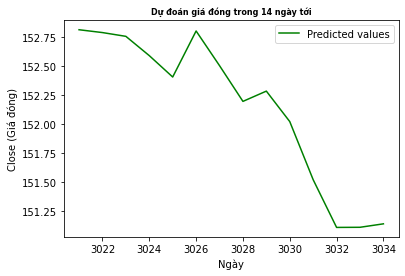

In [ ]:
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()

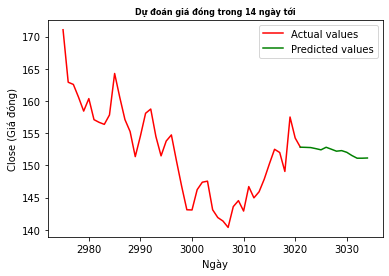

In [ ]:
# Vẽ đồ thị từ bộ dữ liệu chứa cả phần dữ liệu thật + predict cho tương lai
plt.plot(df_apple_real_pred.iloc[-time_step:3022,1], label = 'Actual values', color='r')
plt.plot(df_apple_real_pred.iloc[-future_prediction:,1], label = 'Predicted values', color='g') #Chọn 1 cột để hiển thị - ở đây nhóm chọn cột 1
plt.title("Dự đoán giá đóng trong 14 ngày tới", fontsize=8, fontweight='bold')
plt.xlabel("Ngày")
plt.ylabel("Close (Giá đóng)")
plt.legend()